## Trabalho realizado por:
### - Miguel Marques 2017266263
### - Tiago Fernandes 2017242428

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

### Primeira análise dos dados
<img src="Analise_inicial.png"/>

### Import dataset

In [2]:
dataset = pd.read_csv("dataset_final.csv")

display(dataset.info())
display(dataset.head(5))
display(dataset.columns)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   name             1000 non-null   object
 1   email            1000 non-null   object
 2   gender           1000 non-null   object
 3   ip_address       1000 non-null   object
 4   phone            1000 non-null   object
 5   job              1000 non-null   object
 6   ssn              1000 non-null   object
 7   credit_card      1000 non-null   object
 8   income_per_year  1000 non-null   int64 
 9   age              1000 non-null   int64 
 10  number_kids      1000 non-null   int64 
 11  city             1000 non-null   object
 12  signs            1000 non-null   object
dtypes: int64(3), object(10)
memory usage: 62.6+ KB


None

,name,email,gender,ip_address,phone,job,ssn,credit_card,income_per_year,age,number_kids,city,signs
0,Glenn Rowan,growan0@flickr.com,Male,112.148.196.224,813-696-5199,Waiter,267-29-8707,5602241452639272,19711,29,2,Castelo Branco,Scorpio
1,Cristiano Scartifield,cscartifield1@comcast.net,Male,44.106.121.91,933-931-1180,Accountant,689-09-5993,3579239618421746,50917,30,4,Viseu,Scorpio
2,Marna Heaphy,mheaphy2@amazon.co.uk,Female,155.104.214.101,613-523-2910,Teacher,610-07-3584,3571615590907745,23226,35,0,Viseu,Cancer
3,Saul Avery,savery3@boston.com,Male,59.221.62.108,867-466-4882,Accountant,451-59-2254,201668308913590,57054,57,1,Lisboa,Sagittarius
4,Denver Batter,dbatter4@intel.com,Male,124.84.102.205,748-665-8473,Teacher,701-07-1647,"4,9050683323544E+017",24859,45,2,Aveiro,Aquarius


Index(['name', 'email', 'gender', 'ip_address', 'phone', 'job', 'ssn',
       'credit_card', 'income_per_year', 'age', 'number_kids', 'city',
       'signs'],
      dtype='object')

# Exercise 2.1 - Study the sensitivity of the analysis implemented during the preparation phase.

In [3]:
def calculate_sensitivity_average(dataset, name_column):
    coluna = dataset[name_column]
    coluna = coluna.to_numpy()

    media_tudo = np.average(coluna)
    
    todos = []
    for i in range(len(coluna)):
        aux = np.average(np.delete(coluna, i))
        todos.append(aux)
    
    maxi = 0
    for ind, value in enumerate(todos):
        if ind == 0:
            maxi = abs(media_tudo - value)
        else:
            aux = abs(media_tudo - value)
            if aux > maxi:
                maxi = aux
                
    return maxi

In [4]:
def calculate_sensitivity_std(dataset, name_column):
    coluna = dataset[name_column]
    coluna = coluna.to_numpy()

    std_tudo = np.std(coluna)
    
    todos = []
    for i in range(len(coluna)):
        aux = np.std(np.delete(coluna, i))
        todos.append(aux)
    
    maxi = 0
    for ind, value in enumerate(todos):
        if ind == 0:
            maxi = abs(std_tudo - value)
        else:
            aux = abs(std_tudo - value)
            if aux > maxi:
                maxi = aux
                
    return maxi

In [5]:
df_sensitivity = pd.DataFrame(
    columns=["income_per_year_avg", "income_per_year_std", "age_avg", "age_std", "number_kids_avg", "number_kids_std"],
    index=["dataset_original",
           "dataset_dp_ipc_0.01",
           "dataset_dp_ipc_0.2",
           "dataset_dp_ipc_ln(2)",
           "dataset_dp_ipc_ln(3)",
           "dataset_dp_age_0.01",
           "dataset_dp_age_0.2",
           "dataset_dp_age_ln(2)",
           "dataset_dp_age_ln(3)",
           "dataset_dp_nk_0.01",
           "dataset_dp_nk_0.2",
           "dataset_dp_nk_ln(2)",
           "dataset_dp_nk_ln(3)"]
)

In [6]:
max_diff_income_per_year_avg = calculate_sensitivity_average(dataset, 'income_per_year')
max_diff_income_per_year_std = calculate_sensitivity_std(dataset, 'income_per_year')

max_diff_age_avg = calculate_sensitivity_average(dataset, 'age')
max_diff_age_std = calculate_sensitivity_std(dataset, 'age')

max_diff_number_kids_avg = calculate_sensitivity_average(dataset, 'number_kids')
max_diff_number_kids_std = calculate_sensitivity_std(dataset, 'number_kids')

df_sensitivity.loc["dataset_original"] = [max_diff_income_per_year_avg,
                                          max_diff_income_per_year_std,
                                          max_diff_age_avg,
                                          max_diff_age_std,
                                          max_diff_number_kids_avg,
                                          max_diff_number_kids_std]

In [7]:
df_sensitivity

,income_per_year_avg,income_per_year_std,age_avg,age_std,number_kids_avg,number_kids_std
dataset_original,53.4306,55.7455,0.0188078,0.0104017,0.00204705,0.000812522
dataset_dp_ipc_0.01,NaN,NaN,NaN,NaN,NaN,NaN
dataset_dp_ipc_0.2,NaN,NaN,NaN,NaN,NaN,NaN
dataset_dp_ipc_ln(2),NaN,NaN,NaN,NaN,NaN,NaN
dataset_dp_ipc_ln(3),NaN,NaN,NaN,NaN,NaN,NaN
dataset_dp_age_0.01,NaN,NaN,NaN,NaN,NaN,NaN
dataset_dp_age_0.2,NaN,NaN,NaN,NaN,NaN,NaN
dataset_dp_age_ln(2),NaN,NaN,NaN,NaN,NaN,NaN
dataset_dp_age_ln(3),NaN,NaN,NaN,NaN,NaN,NaN
dataset_dp_nk_0.01,NaN,NaN,NaN,NaN,NaN,NaN


# Exercise 2.2 - Implement a differential privacy mechanism to add to the analyses.

In [8]:
# Final = sensitivity + laplace

def diff_priv(dataset, column, delta_f, epsilon):
    valores_laplace = np.random.laplace(0, delta_f/epsilon, 1000)
    coluna = dataset[column]
    dataset.drop(columns=[column])
    for i, value in enumerate(valores_laplace):
        coluna[i] += value
    dataset[column] = coluna

# Exercise 2.3 - Execute the analysis with the implemented differential privacy.

In [9]:
dataset_dp_avg_0_01 = dataset.copy()
dataset_dp_avg_0_01 = dataset_dp_avg_0_01.drop(columns=["income_per_year", "number_kids", "age"])

dataset_dp_avg_0_2 = dataset.copy()
dataset_dp_avg_0_2 = dataset_dp_avg_0_2.drop(columns=["income_per_year", "number_kids", "age"])

dataset_dp_avg_ln2 = dataset.copy()
dataset_dp_avg_ln2 = dataset_dp_avg_ln2.drop(columns=["income_per_year", "number_kids", "age"])

dataset_dp_avg_ln3 = dataset.copy()
dataset_dp_avg_ln3 = dataset_dp_avg_ln3.drop(columns=["income_per_year", "number_kids", "age"])

# ------------------------

dataset_dp_std_0_01 = dataset.copy()
dataset_dp_std_0_01 = dataset_dp_std_0_01.drop(columns=["income_per_year", "number_kids", "age"])

dataset_dp_std_0_2 = dataset.copy()
dataset_dp_std_0_2 = dataset_dp_std_0_2.drop(columns=["income_per_year", "number_kids", "age"])

dataset_dp_std_ln2 = dataset.copy()
dataset_dp_std_ln2 = dataset_dp_std_ln2.drop(columns=["income_per_year", "number_kids", "age"])

dataset_dp_std_ln3 = dataset.copy()
dataset_dp_std_ln3 = dataset_dp_std_ln3.drop(columns=["income_per_year", "number_kids", "age"])

In [10]:
# Adding noise to the values of "income_per_year"
dataset_dp_ipc_avg = dataset.copy()
dataset_dp_ipc_std = dataset.copy()
diff_priv(dataset_dp_ipc_avg, "income_per_year", df_sensitivity.loc["dataset_original"]["income_per_year_avg"], epsilon=0.01)
diff_priv(dataset_dp_ipc_std, "income_per_year", df_sensitivity.loc["dataset_original"]["income_per_year_std"], epsilon=0.01)
dataset_dp_avg_0_01["income_per_year"] = dataset_dp_ipc_avg["income_per_year"]
dataset_dp_std_0_01["income_per_year"] = dataset_dp_ipc_std["income_per_year"]

# Recalculating the sensitivity of those new values and adding them to the df_sensitivity
new_max_diff_income_per_year_avg = calculate_sensitivity_average(dataset_dp_ipc_avg, 'income_per_year')
new_max_diff_income_per_year_std = calculate_sensitivity_std(dataset_dp_ipc_std, 'income_per_year')

df_sensitivity.loc["dataset_dp_ipc_0.01"] = [new_max_diff_income_per_year_avg, new_max_diff_income_per_year_std, None, None, None, None]

In [11]:
# Adding noise to the values of "income_per_year"
dataset_dp_ipc_avg = dataset.copy()
dataset_dp_ipc_std = dataset.copy()
diff_priv(dataset_dp_ipc_avg, "income_per_year", df_sensitivity.loc["dataset_original"]["income_per_year_avg"], epsilon=0.2)
diff_priv(dataset_dp_ipc_std, "income_per_year", df_sensitivity.loc["dataset_original"]["income_per_year_std"], epsilon=0.2)
dataset_dp_avg_0_2["income_per_year"] = dataset_dp_ipc_avg["income_per_year"]
dataset_dp_std_0_2["income_per_year"] = dataset_dp_ipc_std["income_per_year"]

# Recalculating the sensitivity of those new values and adding them to the df_sensitivity
new_max_diff_income_per_year_avg = calculate_sensitivity_average(dataset_dp_ipc_avg, 'income_per_year')
new_max_diff_income_per_year_std = calculate_sensitivity_std(dataset_dp_ipc_std, 'income_per_year')

df_sensitivity.loc["dataset_dp_ipc_0.2"] = [new_max_diff_income_per_year_avg, new_max_diff_income_per_year_std, None, None, None, None]

In [12]:
# Adding noise to the values of "income_per_year"
dataset_dp_ipc_avg = dataset.copy()
dataset_dp_ipc_std = dataset.copy()
diff_priv(dataset_dp_ipc_avg, "income_per_year", df_sensitivity.loc["dataset_original"]["income_per_year_avg"], epsilon=np.log(2))
diff_priv(dataset_dp_ipc_std, "income_per_year", df_sensitivity.loc["dataset_original"]["income_per_year_std"], epsilon=np.log(2))
dataset_dp_avg_ln2["income_per_year"] = dataset_dp_ipc_avg["income_per_year"]
dataset_dp_std_ln2["income_per_year"] = dataset_dp_ipc_std["income_per_year"]

# Recalculating the sensitivity of those new values and adding them to the df_sensitivity
new_max_diff_income_per_year_avg = calculate_sensitivity_average(dataset_dp_ipc_avg, 'income_per_year')
new_max_diff_income_per_year_std = calculate_sensitivity_std(dataset_dp_ipc_std, 'income_per_year')

df_sensitivity.loc["dataset_dp_ipc_ln(2)"] = [new_max_diff_income_per_year_avg, new_max_diff_income_per_year_std, None, None, None, None]

In [13]:
# Adding noise to the values of "income_per_year"
dataset_dp_ipc_avg = dataset.copy()
dataset_dp_ipc_std = dataset.copy()
diff_priv(dataset_dp_ipc_avg, "income_per_year", df_sensitivity.loc["dataset_original"]["income_per_year_avg"], epsilon=np.log(3))
diff_priv(dataset_dp_ipc_std, "income_per_year", df_sensitivity.loc["dataset_original"]["income_per_year_std"], epsilon=np.log(3))
dataset_dp_avg_ln3["income_per_year"] = dataset_dp_ipc_avg["income_per_year"]
dataset_dp_std_ln3["income_per_year"] = dataset_dp_ipc_std["income_per_year"]

# Recalculating the sensitivity of those new values and adding them to the df_sensitivity
new_max_diff_income_per_year_avg = calculate_sensitivity_average(dataset_dp_ipc_avg, 'income_per_year')
new_max_diff_income_per_year_std = calculate_sensitivity_std(dataset_dp_ipc_std, 'income_per_year')

df_sensitivity.loc["dataset_dp_ipc_ln(3)"] = [new_max_diff_income_per_year_avg, new_max_diff_income_per_year_std, None, None, None, None]

In [14]:
# Adding noise to the values of "age"
dataset_dp_age_avg = dataset.copy()
dataset_dp_age_std = dataset.copy()
diff_priv(dataset_dp_age_avg, "age", df_sensitivity.loc["dataset_original"]["age_avg"], epsilon=0.01)
diff_priv(dataset_dp_age_std, "age", df_sensitivity.loc["dataset_original"]["age_std"], epsilon=0.01)
dataset_dp_avg_0_01["age"] = dataset_dp_age_avg["age"]
dataset_dp_std_0_01["age"] = dataset_dp_age_std["age"]

# Recalculating the sensitivity of those new values and adding them to the df_sensitivity
new_max_diff_income_per_year_avg = calculate_sensitivity_average(dataset_dp_age_avg, 'age')
new_max_diff_income_per_year_std = calculate_sensitivity_std(dataset_dp_age_std, 'age')

df_sensitivity.loc["dataset_dp_age_0.01"] = [None, None, new_max_diff_income_per_year_avg, new_max_diff_income_per_year_std, None, None]

In [15]:
# Adding noise to the values of "age"
dataset_dp_age_avg = dataset.copy()
dataset_dp_age_std = dataset.copy()
diff_priv(dataset_dp_age_avg, "age", df_sensitivity.loc["dataset_original"]["age_avg"], epsilon=0.2)
diff_priv(dataset_dp_age_std, "age", df_sensitivity.loc["dataset_original"]["age_std"], epsilon=0.2)
dataset_dp_avg_0_2["age"] = dataset_dp_age_avg["age"]
dataset_dp_std_0_2["age"] = dataset_dp_age_std["age"]

# Recalculating the sensitivity of those new values and adding them to the df_sensitivity
new_max_diff_income_per_year_avg = calculate_sensitivity_average(dataset_dp_age_avg, 'age')
new_max_diff_income_per_year_std = calculate_sensitivity_std(dataset_dp_age_std, 'age')

df_sensitivity.loc["dataset_dp_age_0.2"] = [None, None, new_max_diff_income_per_year_avg, new_max_diff_income_per_year_std, None, None]

In [16]:
# Adding noise to the values of "age"
dataset_dp_age_avg = dataset.copy()
dataset_dp_age_std = dataset.copy()
diff_priv(dataset_dp_age_avg, "age", df_sensitivity.loc["dataset_original"]["age_avg"], epsilon=np.log(2))
diff_priv(dataset_dp_age_std, "age", df_sensitivity.loc["dataset_original"]["age_std"], epsilon=np.log(2))
dataset_dp_avg_ln2["age"] = dataset_dp_age_avg["age"]
dataset_dp_std_ln2["age"] = dataset_dp_age_std["age"]

# Recalculating the sensitivity of those new values and adding them to the df_sensitivity
new_max_diff_income_per_year_avg = calculate_sensitivity_average(dataset_dp_age_avg, 'age')
new_max_diff_income_per_year_std = calculate_sensitivity_std(dataset_dp_age_std, 'age')

df_sensitivity.loc["dataset_dp_age_ln(2)"] = [None, None, new_max_diff_income_per_year_avg, new_max_diff_income_per_year_std, None, None]

In [17]:
# Adding noise to the values of "age"
dataset_dp_age_avg = dataset.copy()
dataset_dp_age_std = dataset.copy()
diff_priv(dataset_dp_age_avg, "age", df_sensitivity.loc["dataset_original"]["age_avg"], epsilon=np.log(3))
diff_priv(dataset_dp_age_std, "age", df_sensitivity.loc["dataset_original"]["age_std"], epsilon=np.log(3))
dataset_dp_avg_ln3["age"] = dataset_dp_age_avg["age"]
dataset_dp_std_ln3["age"] = dataset_dp_age_std["age"]

# Recalculating the sensitivity of those new values and adding them to the df_sensitivity
new_max_diff_income_per_year_avg = calculate_sensitivity_average(dataset_dp_age_avg, 'age')
new_max_diff_income_per_year_std = calculate_sensitivity_std(dataset_dp_age_std, 'age')

df_sensitivity.loc["dataset_dp_age_ln(3)"] = [None, None, new_max_diff_income_per_year_avg, new_max_diff_income_per_year_std, None, None]

In [18]:
# Adding noise to the values of "number_kids"
dataset_dp_nk_avg = dataset.copy()
dataset_dp_nk_std = dataset.copy()
diff_priv(dataset_dp_nk_avg, "number_kids", df_sensitivity.loc["dataset_original"]["number_kids_avg"], epsilon=0.01)
diff_priv(dataset_dp_nk_std, "number_kids", df_sensitivity.loc["dataset_original"]["number_kids_std"], epsilon=0.01)
dataset_dp_avg_0_01["number_kids"] = dataset_dp_nk_avg["number_kids"]
dataset_dp_std_0_01["number_kids"] = dataset_dp_nk_std["number_kids"]

# Recalculating the sensitivity of those new values and adding them to the df_sensitivity
new_max_diff_nk_avg = calculate_sensitivity_average(dataset_dp_nk_avg, 'number_kids')
new_max_diff_nk_std = calculate_sensitivity_std(dataset_dp_nk_std, 'number_kids')

df_sensitivity.loc["dataset_dp_nk_0.01"] = [None, None, None, None, new_max_diff_nk_avg, new_max_diff_nk_std]

In [19]:
# Adding noise to the values of "number_kids"
dataset_dp_nk_avg = dataset.copy()
dataset_dp_nk_std = dataset.copy()
diff_priv(dataset_dp_nk_avg, "number_kids", df_sensitivity.loc["dataset_original"]["number_kids_avg"], epsilon=0.2)
diff_priv(dataset_dp_nk_std, "number_kids", df_sensitivity.loc["dataset_original"]["number_kids_std"], epsilon=0.2)
dataset_dp_avg_0_2["number_kids"] = dataset_dp_nk_avg["number_kids"]
dataset_dp_std_0_2["number_kids"] = dataset_dp_nk_std["number_kids"]

# Recalculating the sensitivity of those new values and adding them to the df_sensitivity
new_max_diff_nk_avg = calculate_sensitivity_average(dataset_dp_nk_avg, 'number_kids')
new_max_diff_nk_std = calculate_sensitivity_std(dataset_dp_nk_std, 'number_kids')

df_sensitivity.loc["dataset_dp_nk_0.2"] = [None, None, None, None, new_max_diff_nk_avg, new_max_diff_nk_std]

In [20]:
# Adding noise to the values of "number_kids"
dataset_dp_nk_avg = dataset.copy()
dataset_dp_nk_std = dataset.copy()
diff_priv(dataset_dp_nk_avg, "number_kids", df_sensitivity.loc["dataset_original"]["number_kids_avg"], epsilon=np.log(2))
diff_priv(dataset_dp_nk_std, "number_kids", df_sensitivity.loc["dataset_original"]["number_kids_std"], epsilon=np.log(2))
dataset_dp_avg_ln2["number_kids"] = dataset_dp_nk_avg["number_kids"]
dataset_dp_std_ln2["number_kids"] = dataset_dp_nk_std["number_kids"]

# Recalculating the sensitivity of those new values and adding them to the df_sensitivity
new_max_diff_nk_avg = calculate_sensitivity_average(dataset_dp_nk_avg, 'number_kids')
new_max_diff_nk_std = calculate_sensitivity_std(dataset_dp_nk_std, 'number_kids')

df_sensitivity.loc["dataset_dp_nk_ln(2)"] = [None, None, None, None, new_max_diff_nk_avg, new_max_diff_nk_std]

In [21]:
# Adding noise to the values of "number_kids"
dataset_dp_nk_avg = dataset.copy()
dataset_dp_nk_std = dataset.copy()
diff_priv(dataset_dp_nk_avg, "number_kids", df_sensitivity.loc["dataset_original"]["number_kids_avg"], epsilon=np.log(3))
diff_priv(dataset_dp_nk_std, "number_kids", df_sensitivity.loc["dataset_original"]["number_kids_std"], epsilon=np.log(3))
dataset_dp_avg_ln3["number_kids"] = dataset_dp_nk_avg["number_kids"]
dataset_dp_std_ln3["number_kids"] = dataset_dp_nk_std["number_kids"]

# Recalculating the sensitivity of those new values and adding them to the df_sensitivity
new_max_diff_nk_avg = calculate_sensitivity_average(dataset_dp_nk_avg, 'number_kids')
new_max_diff_nk_std = calculate_sensitivity_std(dataset_dp_nk_std, 'number_kids')

df_sensitivity.loc["dataset_dp_nk_ln(3)"] = [None, None, None, None, new_max_diff_nk_avg, new_max_diff_nk_std]

# Exercise 4 - Analyze the results and compare with the results obtained in the other phases.

### Nesta tabela abaixo, podemos ver as diferenças para as várias colunas, aplicando os diferentes valores de epsilon

In [22]:
df_sensitivity

,income_per_year_avg,income_per_year_std,age_avg,age_std,number_kids_avg,number_kids_std
dataset_original,53.4306,55.7455,0.0188078,0.0104017,0.00204705,0.000812522
dataset_dp_ipc_0.01,67.4052,85.0813,None,None,None,None
dataset_dp_ipc_0.2,53.9457,58.1244,None,None,None,None
dataset_dp_ipc_ln(2),53.4563,55.8581,None,None,None,None
dataset_dp_ipc_ln(3),53.409,55.7415,None,None,None,None
dataset_dp_age_0.01,None,None,0.0275956,0.0186707,None,None
dataset_dp_age_0.2,None,None,0.0193263,0.0112802,None,None
dataset_dp_age_ln(2),None,None,0.0192863,0.0112562,None,None
dataset_dp_age_ln(3),None,None,0.0192863,0.0111734,None,None
dataset_dp_nk_0.01,None,None,None,None,0.00345045,0.00161498


In [23]:
x = [0, 0.01, 0.2, np.log(2), np.log(3)]

ipc_avg = [df_sensitivity.loc["dataset_original"]["income_per_year_avg"],
           df_sensitivity.loc["dataset_dp_ipc_0.01"]["income_per_year_avg"],
           df_sensitivity.loc["dataset_dp_ipc_0.2"]["income_per_year_avg"],
           df_sensitivity.loc["dataset_dp_ipc_ln(2)"]["income_per_year_avg"],
           df_sensitivity.loc["dataset_dp_ipc_ln(3)"]["income_per_year_avg"]]

ipc_std = [df_sensitivity.loc["dataset_original"]["income_per_year_std"],
           df_sensitivity.loc["dataset_dp_ipc_0.01"]["income_per_year_std"],
           df_sensitivity.loc["dataset_dp_ipc_0.2"]["income_per_year_std"],
           df_sensitivity.loc["dataset_dp_ipc_ln(2)"]["income_per_year_std"],
           df_sensitivity.loc["dataset_dp_ipc_ln(3)"]["income_per_year_std"]]

age_avg = [df_sensitivity.loc["dataset_original"]["age_avg"],
           df_sensitivity.loc["dataset_dp_age_0.01"]["age_avg"],
           df_sensitivity.loc["dataset_dp_age_0.2"]["age_avg"],
           df_sensitivity.loc["dataset_dp_age_ln(2)"]["age_avg"],
           df_sensitivity.loc["dataset_dp_age_ln(3)"]["age_avg"]]

age_std = [df_sensitivity.loc["dataset_original"]["age_std"],
           df_sensitivity.loc["dataset_dp_age_0.01"]["age_std"],
           df_sensitivity.loc["dataset_dp_age_0.2"]["age_std"],
           df_sensitivity.loc["dataset_dp_age_ln(2)"]["age_std"],
           df_sensitivity.loc["dataset_dp_age_ln(3)"]["age_std"]]

nk_avg = [df_sensitivity.loc["dataset_original"]["number_kids_avg"],
           df_sensitivity.loc["dataset_dp_nk_0.01"]["number_kids_avg"],
           df_sensitivity.loc["dataset_dp_nk_0.2"]["number_kids_avg"],
           df_sensitivity.loc["dataset_dp_nk_ln(2)"]["number_kids_avg"],
           df_sensitivity.loc["dataset_dp_nk_ln(3)"]["number_kids_avg"]]

nk_std = [df_sensitivity.loc["dataset_original"]["number_kids_std"],
           df_sensitivity.loc["dataset_dp_nk_0.01"]["number_kids_std"],
           df_sensitivity.loc["dataset_dp_nk_0.2"]["number_kids_std"],
           df_sensitivity.loc["dataset_dp_nk_ln(2)"]["number_kids_std"],
           df_sensitivity.loc["dataset_dp_nk_ln(3)"]["number_kids_std"]]

In [24]:
def draw_graphs(title, title_avg, title_std, x, avg, std):
    plt.figure(figsize=(12, 7))

    plt.grid(True)
    plt.title("Sensitivity of " + title, fontsize='x-large')
    plt.ylabel("Sensitivity", fontsize='x-large')
    plt.xlabel("Epsilon value", fontsize='x-large')
    
    for i in range(len(x)):
        plt.scatter(x[i], avg[i], color='blue')
        plt.scatter(x[i], std[i], color='red')
    
    plt.plot(x, avg, label="Evolution of avg (original, 0.01, 0.2, ln(2), ln(3))", color='blue')
    plt.plot(x, std, label="Evolution of std (original, 0.01, 0.2, ln(2), ln(3))", color='red')
    
    plt.legend()
    
    plt.show()

### Nestes gráficos abaixo, podemos ver a evolução das respetivas funções de sensibilidade, sendo que quanto mais baixo for o valor do epsilon, maior a diferença absoluta para o valor médio de média e std

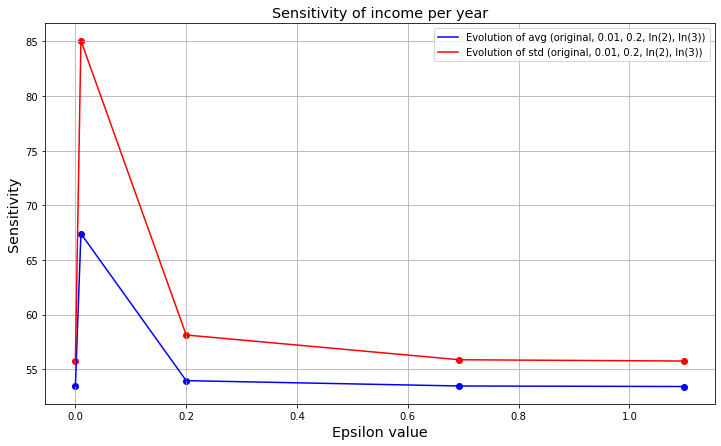

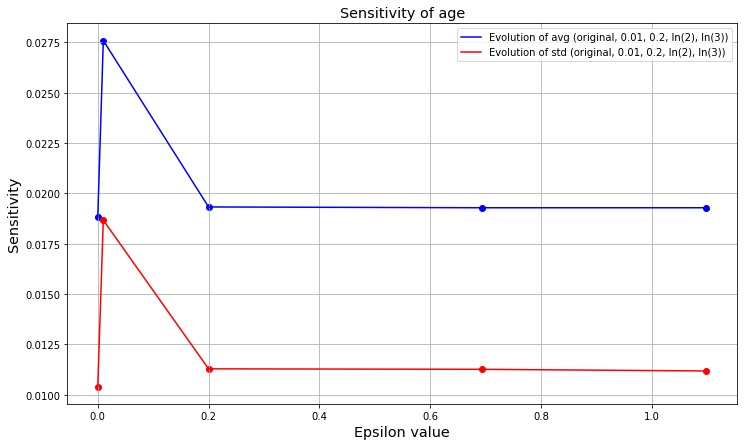

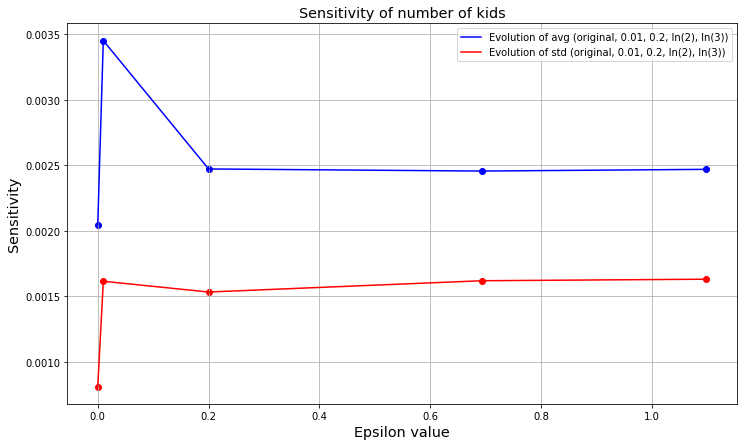

In [25]:
draw_graphs("income per year", "income_per_year_avg", "income_per_year_std", x, ipc_avg, ipc_std)
draw_graphs("age", "age_avg", "age_std", x, age_avg, age_std)
draw_graphs("number of kids", "nk_avg", "nk_std", x, nk_avg, nk_std)

### - Nos gráficos em baixo que não existe grande diferença dos valores originais para os alterados, o padrão que estes seguem é muito semelhante ao original (quando epsilon = 0.01, essa diferença é mais notório, enquanto que quando epsilon = ln(3), a diferença é mínima)

### - Nos gráficos em essa diferença para os valores originais é notória, por norma todos os dados são aleatórios

#### Grouped by Age - Income per year (Mean)

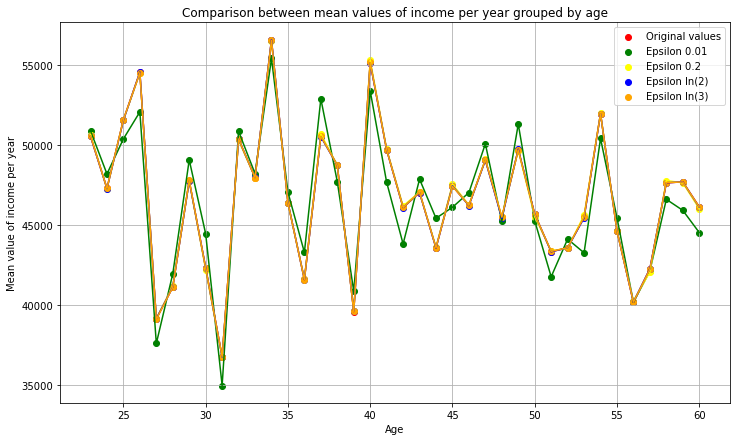

<Figure size 432x288 with 0 Axes>

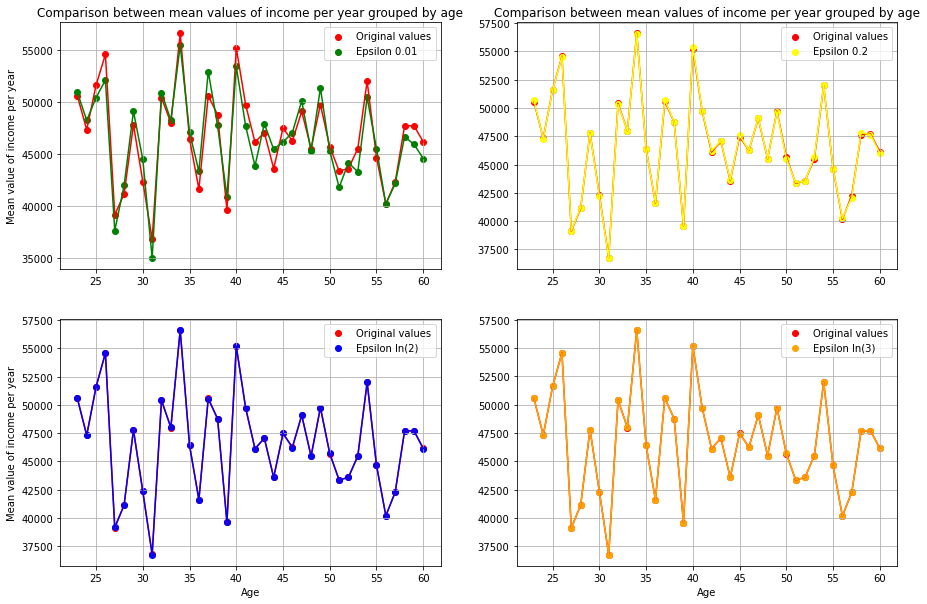

In [26]:
original_avg_ipy = dataset.groupby("age").mean()[["income_per_year", "number_kids"]]

original_avg_0_01_ipy = dataset.copy()
original_avg_0_2_ipy = dataset.copy()
original_avg_ln2_ipy = dataset.copy()
original_avg_ln3_ipy = dataset.copy()

diff_priv(original_avg_0_01_ipy, "income_per_year", df_sensitivity.loc["dataset_original"]["income_per_year_avg"], epsilon=0.01)
diff_priv(original_avg_0_2_ipy, "income_per_year", df_sensitivity.loc["dataset_original"]["income_per_year_avg"], epsilon=0.2)
diff_priv(original_avg_ln2_ipy, "income_per_year", df_sensitivity.loc["dataset_original"]["income_per_year_avg"], epsilon=np.log(2))
diff_priv(original_avg_ln3_ipy, "income_per_year", df_sensitivity.loc["dataset_original"]["income_per_year_avg"], epsilon=np.log(3))

original_avg_0_01_ipy = original_avg_0_01_ipy.groupby("age").mean()[["income_per_year", "number_kids"]]
original_avg_0_2_ipy = original_avg_0_2_ipy.groupby("age").mean()[["income_per_year", "number_kids"]]
original_avg_ln2_ipy = original_avg_ln2_ipy.groupby("age").mean()[["income_per_year", "number_kids"]]
original_avg_ln3_ipy = original_avg_ln3_ipy.groupby("age").mean()[["income_per_year", "number_kids"]]

x = np.sort(dataset["age"].unique())

plt.figure(figsize=(12, 7))
plt.grid(True)
plt.title("Comparison between mean values of income per year grouped by age")
plt.ylabel("Mean value of income per year")
plt.xlabel("Age")

plt.plot(x, original_avg_ipy['income_per_year'], color='red')
plt.scatter(x, original_avg_ipy['income_per_year'], color='red', label="Original values")
plt.plot(x, original_avg_0_01_ipy["income_per_year"], color='green')
plt.scatter(x, original_avg_0_01_ipy["income_per_year"], label="Epsilon 0.01", color='green')
plt.plot(x, original_avg_0_2_ipy["income_per_year"], color='yellow')
plt.scatter(x, original_avg_0_2_ipy["income_per_year"], label="Epsilon 0.2", color='yellow')
plt.plot(x, original_avg_ln2_ipy["income_per_year"], color='blue')
plt.scatter(x, original_avg_ln2_ipy["income_per_year"], label="Epsilon ln(2)", color='blue')
plt.plot(x, original_avg_ln3_ipy["income_per_year"], color='orange')
plt.scatter(x, original_avg_ln3_ipy["income_per_year"], label="Epsilon ln(3)", color='orange')

plt.legend()
plt.show()

plt.figure()
plt.subplots(2, 2, figsize=(15, 10))

plt.subplot(2, 2, 1)
plt.grid(True)
plt.title("Comparison between mean values of income per year grouped by age")
plt.ylabel("Mean value of income per year")
plt.plot(x, original_avg_ipy['income_per_year'], color='red')
plt.scatter(x, original_avg_ipy['income_per_year'], color='red', label="Original values")
plt.plot(x, original_avg_0_01_ipy["income_per_year"], color='green')
plt.scatter(x, original_avg_0_01_ipy["income_per_year"], label="Epsilon 0.01", color='green')
plt.legend()

plt.subplot(2, 2, 2)
plt.grid(True)
plt.title("Comparison between mean values of income per year grouped by age")
plt.plot(x, original_avg_ipy['income_per_year'], color='red')
plt.scatter(x, original_avg_ipy['income_per_year'], color='red', label="Original values")
plt.plot(x, original_avg_0_2_ipy["income_per_year"], color='yellow')
plt.scatter(x, original_avg_0_2_ipy["income_per_year"], label="Epsilon 0.2", color='yellow')
plt.legend()

plt.subplot(2, 2, 3)
plt.grid(True)
plt.ylabel("Mean value of income per year")
plt.xlabel("Age")
plt.plot(x, original_avg_ipy['income_per_year'], color='red')
plt.scatter(x, original_avg_ipy['income_per_year'], color='red', label="Original values")
plt.plot(x, original_avg_ln2_ipy["income_per_year"], color='blue')
plt.scatter(x, original_avg_ln2_ipy["income_per_year"], label="Epsilon ln(2)", color='blue')
plt.legend()

plt.subplot(2, 2, 4)
plt.grid(True)
plt.xlabel("Age")
plt.plot(x, original_avg_ipy['income_per_year'], color='red')
plt.scatter(x, original_avg_ipy['income_per_year'], color='red', label="Original values")
plt.plot(x, original_avg_ln3_ipy["income_per_year"], color='orange')
plt.scatter(x, original_avg_ln3_ipy["income_per_year"], label="Epsilon ln(3)", color='orange')
plt.legend()
plt.show()

#### Grouped by Age - Income per year (Std)

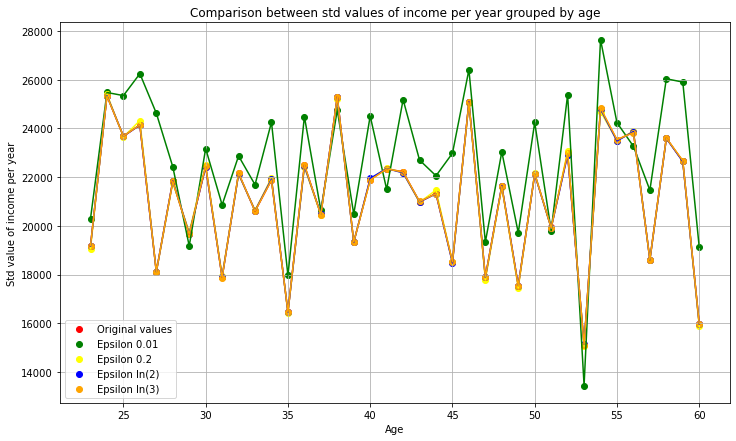

<Figure size 432x288 with 0 Axes>

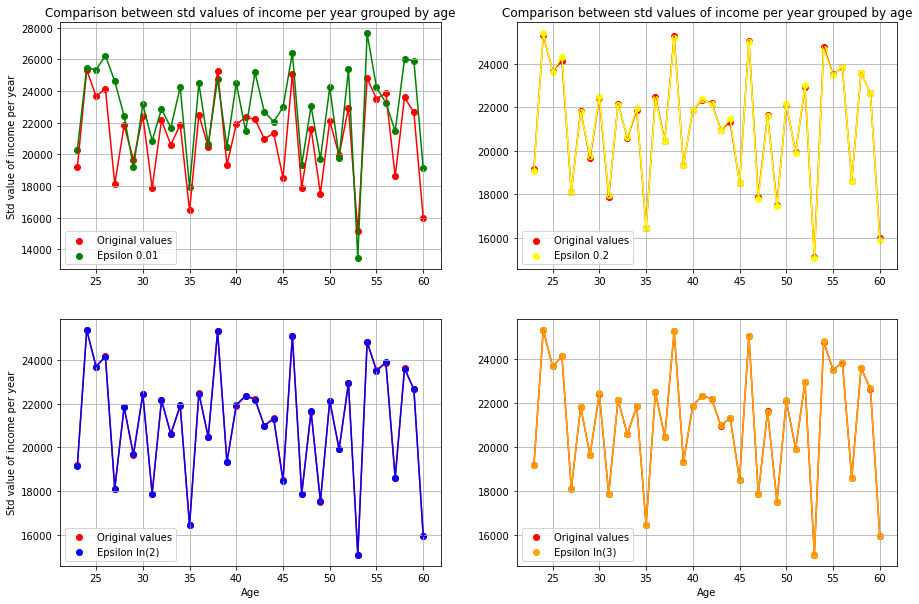

In [27]:
original_std_ipy = dataset.groupby("age").std()[["income_per_year", "number_kids"]]

original_std_0_01_ipy = dataset.copy()
original_std_0_2_ipy = dataset.copy()
original_std_ln2_ipy = dataset.copy()
original_std_ln3_ipy = dataset.copy()

diff_priv(original_std_0_01_ipy, "income_per_year", df_sensitivity.loc["dataset_original"]["income_per_year_std"], epsilon=0.01)
diff_priv(original_std_0_2_ipy, "income_per_year", df_sensitivity.loc["dataset_original"]["income_per_year_std"], epsilon=0.2)
diff_priv(original_std_ln2_ipy, "income_per_year", df_sensitivity.loc["dataset_original"]["income_per_year_std"], epsilon=np.log(2))
diff_priv(original_std_ln3_ipy, "income_per_year", df_sensitivity.loc["dataset_original"]["income_per_year_std"], epsilon=np.log(3))

original_std_0_01_ipy = original_std_0_01_ipy.groupby("age").std()[["income_per_year", "number_kids"]]
original_std_0_2_ipy = original_std_0_2_ipy.groupby("age").std()[["income_per_year", "number_kids"]]
original_std_ln2_ipy = original_std_ln2_ipy.groupby("age").std()[["income_per_year", "number_kids"]]
original_std_ln3_ipy = original_std_ln3_ipy.groupby("age").std()[["income_per_year", "number_kids"]]

x = np.sort(dataset["age"].unique())

plt.figure(figsize=(12, 7))
plt.grid(True)
plt.title("Comparison between std values of income per year grouped by age")
plt.ylabel("Std value of income per year")
plt.xlabel("Age")

plt.plot(x, original_std_ipy['income_per_year'], color='red')
plt.scatter(x, original_std_ipy['income_per_year'], color='red', label="Original values")
plt.plot(x, original_std_0_01_ipy["income_per_year"], color='green')
plt.scatter(x, original_std_0_01_ipy["income_per_year"], label="Epsilon 0.01", color='green')
plt.plot(x, original_std_0_2_ipy["income_per_year"], color='yellow')
plt.scatter(x, original_std_0_2_ipy["income_per_year"], label="Epsilon 0.2", color='yellow')
plt.plot(x, original_std_ln2_ipy["income_per_year"], color='blue')
plt.scatter(x, original_std_ln2_ipy["income_per_year"], label="Epsilon ln(2)", color='blue')
plt.plot(x, original_std_ln3_ipy["income_per_year"], color='orange')
plt.scatter(x, original_std_ln3_ipy["income_per_year"], label="Epsilon ln(3)", color='orange')

plt.legend()
plt.show()

plt.figure()
plt.subplots(2, 2, figsize=(15, 10))

plt.subplot(2, 2, 1)
plt.grid(True)
plt.title("Comparison between std values of income per year grouped by age")
plt.ylabel("Std value of income per year")
plt.plot(x, original_std_ipy['income_per_year'], color='red')
plt.scatter(x, original_std_ipy['income_per_year'], color='red', label="Original values")
plt.plot(x, original_std_0_01_ipy["income_per_year"], color='green')
plt.scatter(x, original_std_0_01_ipy["income_per_year"], label="Epsilon 0.01", color='green')
plt.legend()

plt.subplot(2, 2, 2)
plt.grid(True)
plt.title("Comparison between std values of income per year grouped by age")
plt.plot(x, original_std_ipy['income_per_year'], color='red')
plt.scatter(x, original_std_ipy['income_per_year'], color='red', label="Original values")
plt.plot(x, original_std_0_2_ipy["income_per_year"], color='yellow')
plt.scatter(x, original_std_0_2_ipy["income_per_year"], label="Epsilon 0.2", color='yellow')
plt.legend()

plt.subplot(2, 2, 3)
plt.grid(True)
plt.ylabel("Std value of income per year")
plt.xlabel("Age")
plt.plot(x, original_std_ipy['income_per_year'], color='red')
plt.scatter(x, original_std_ipy['income_per_year'], color='red', label="Original values")
plt.plot(x, original_std_ln2_ipy["income_per_year"], color='blue')
plt.scatter(x, original_std_ln2_ipy["income_per_year"], label="Epsilon ln(2)", color='blue')
plt.legend()

plt.subplot(2, 2, 4)
plt.grid(True)
plt.xlabel("Age")
plt.plot(x, original_std_ipy['income_per_year'], color='red')
plt.scatter(x, original_std_ipy['income_per_year'], color='red', label="Original values")
plt.plot(x, original_std_ln3_ipy["income_per_year"], color='orange')
plt.scatter(x, original_std_ln3_ipy["income_per_year"], label="Epsilon ln(3)", color='orange')
plt.legend()
plt.show()

#### Grouped by Age - Number of kids (Mean)

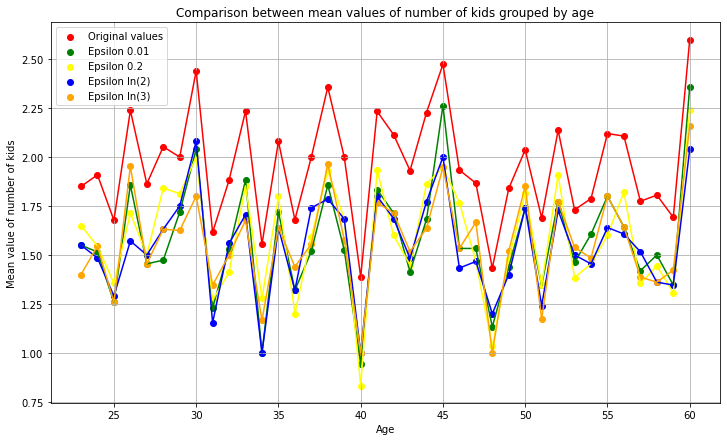

<Figure size 432x288 with 0 Axes>

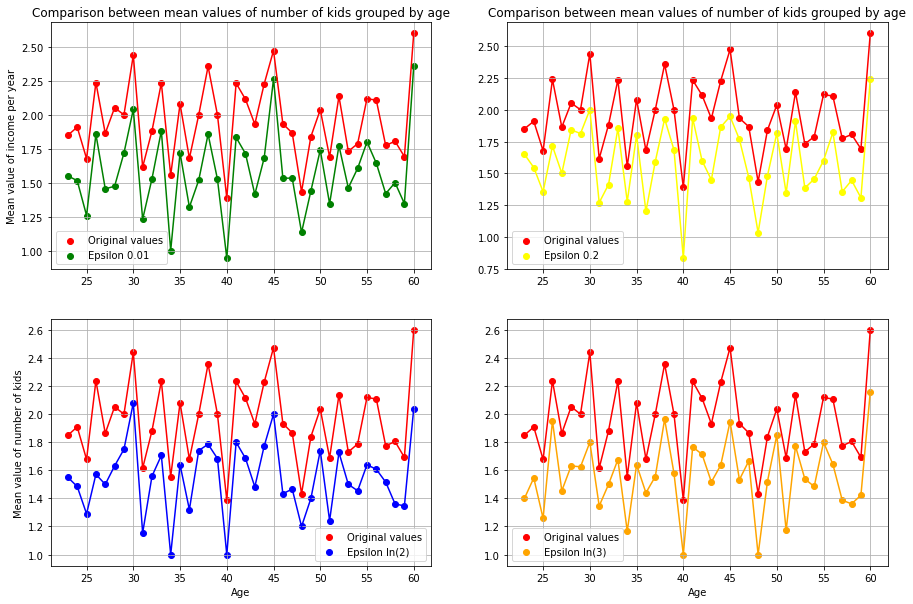

In [28]:
original_avg_nk = dataset.groupby("age").mean()[["income_per_year", "number_kids"]]

original_avg_0_01_nk = dataset.copy()
original_avg_0_2_nk = dataset.copy()
original_avg_ln2_nk = dataset.copy()
original_avg_ln3_nk = dataset.copy()

diff_priv(original_avg_0_01_nk, "number_kids", df_sensitivity.loc["dataset_original"]["number_kids_avg"], epsilon=0.01)
diff_priv(original_avg_0_2_nk, "number_kids", df_sensitivity.loc["dataset_original"]["number_kids_avg"], epsilon=0.2)
diff_priv(original_avg_ln2_nk, "number_kids", df_sensitivity.loc["dataset_original"]["number_kids_avg"], epsilon=np.log(2))
diff_priv(original_avg_ln3_nk, "number_kids", df_sensitivity.loc["dataset_original"]["number_kids_avg"], epsilon=np.log(3))

original_avg_0_01_nk = original_avg_0_01_nk.groupby("age").mean()[["income_per_year", "number_kids"]]
original_avg_0_2_nk = original_avg_0_2_nk.groupby("age").mean()[["income_per_year", "number_kids"]]
original_avg_ln2_nk = original_avg_ln2_nk.groupby("age").mean()[["income_per_year", "number_kids"]]
original_avg_ln3_nk = original_avg_ln3_nk.groupby("age").mean()[["income_per_year", "number_kids"]]

x = np.sort(dataset["age"].unique())

plt.figure(figsize=(12, 7))
plt.grid(True)
plt.title("Comparison between mean values of number of kids grouped by age")
plt.ylabel("Mean value of number of kids")
plt.xlabel("Age")

plt.plot(x, original_avg_nk['number_kids'], color='red')
plt.scatter(x, original_avg_nk['number_kids'], color='red', label="Original values")
plt.plot(x, original_avg_0_01_nk["number_kids"], color='green')
plt.scatter(x, original_avg_0_01_nk["number_kids"], label="Epsilon 0.01", color='green')
plt.plot(x, original_avg_0_2_nk["number_kids"], color='yellow')
plt.scatter(x, original_avg_0_2_nk["number_kids"], label="Epsilon 0.2", color='yellow')
plt.plot(x, original_avg_ln2_nk["number_kids"], color='blue')
plt.scatter(x, original_avg_ln2_nk["number_kids"], label="Epsilon ln(2)", color='blue')
plt.plot(x, original_avg_ln3_nk["number_kids"], color='orange')
plt.scatter(x, original_avg_ln3_nk["number_kids"], label="Epsilon ln(3)", color='orange')

plt.legend()
plt.show()

plt.figure()
plt.subplots(2, 2, figsize=(15, 10))

plt.subplot(2, 2, 1)
plt.grid(True)
plt.title("Comparison between mean values of number of kids grouped by age")
plt.ylabel("Mean value of income per year")
plt.plot(x, original_avg_nk['number_kids'], color='red')
plt.scatter(x, original_avg_nk['number_kids'], color='red', label="Original values")
plt.plot(x, original_avg_0_01_nk["number_kids"], color='green')
plt.scatter(x, original_avg_0_01_nk["number_kids"], label="Epsilon 0.01", color='green')
plt.legend()

plt.subplot(2, 2, 2)
plt.grid(True)
plt.title("Comparison between mean values of number of kids grouped by age")
plt.plot(x, original_avg_nk['number_kids'], color='red')
plt.scatter(x, original_avg_nk['number_kids'], color='red', label="Original values")
plt.plot(x, original_avg_0_2_nk["number_kids"], color='yellow')
plt.scatter(x, original_avg_0_2_nk["number_kids"], label="Epsilon 0.2", color='yellow')
plt.legend()

plt.subplot(2, 2, 3)
plt.grid(True)
plt.ylabel("Mean value of number of kids")
plt.xlabel("Age")
plt.plot(x, original_avg_nk['number_kids'], color='red')
plt.scatter(x, original_avg_nk['number_kids'], color='red', label="Original values")
plt.plot(x, original_avg_ln2_nk["number_kids"], color='blue')
plt.scatter(x, original_avg_ln2_nk["number_kids"], label="Epsilon ln(2)", color='blue')
plt.legend()

plt.subplot(2, 2, 4)
plt.grid(True)
plt.xlabel("Age")
plt.plot(x, original_avg_nk['number_kids'], color='red')
plt.scatter(x, original_avg_nk['number_kids'], color='red', label="Original values")
plt.plot(x, original_avg_ln3_nk["number_kids"], color='orange')
plt.scatter(x, original_avg_ln3_nk["number_kids"], label="Epsilon ln(3)", color='orange')
plt.legend()
plt.show()

#### Grouped by Age - Number of kids (Std)

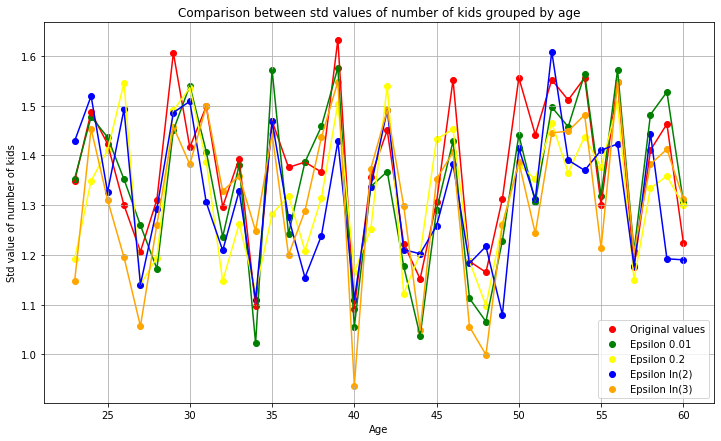

<Figure size 432x288 with 0 Axes>

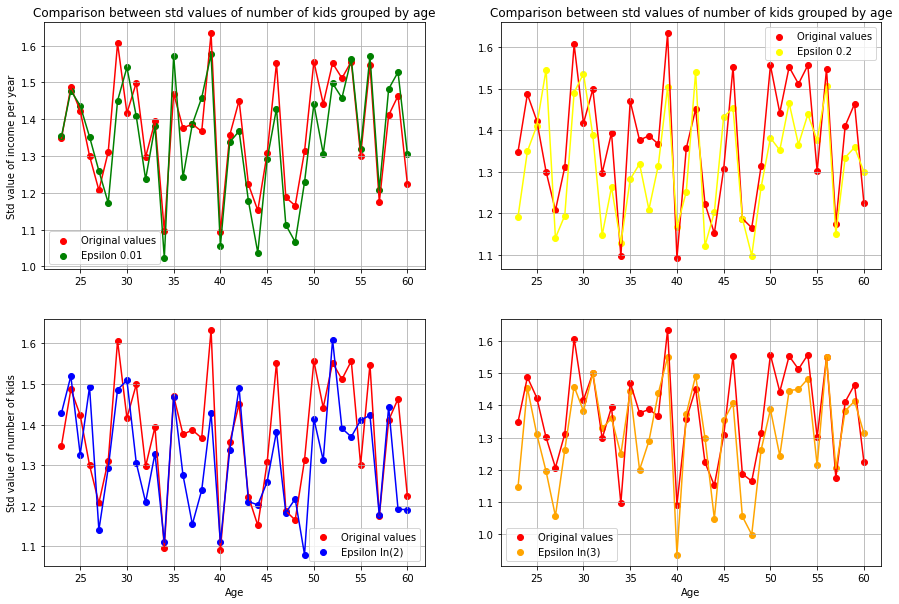

In [29]:
original_std_nk = dataset.groupby("age").std()[["income_per_year", "number_kids"]]

original_std_0_01_nk = dataset.copy()
original_std_0_2_nk = dataset.copy()
original_std_ln2_nk = dataset.copy()
original_std_ln3_nk = dataset.copy()

diff_priv(original_std_0_01_nk, "number_kids", df_sensitivity.loc["dataset_original"]["number_kids_std"], epsilon=0.01)
diff_priv(original_std_0_2_nk, "number_kids", df_sensitivity.loc["dataset_original"]["number_kids_std"], epsilon=0.2)
diff_priv(original_std_ln2_nk, "number_kids", df_sensitivity.loc["dataset_original"]["number_kids_std"], epsilon=np.log(2))
diff_priv(original_std_ln3_nk, "number_kids", df_sensitivity.loc["dataset_original"]["number_kids_std"], epsilon=np.log(3))

original_std_0_01_nk = original_std_0_01_nk.groupby("age").std()[["income_per_year", "number_kids"]]
original_std_0_2_nk = original_std_0_2_nk.groupby("age").std()[["income_per_year", "number_kids"]]
original_std_ln2_nk = original_std_ln2_nk.groupby("age").std()[["income_per_year", "number_kids"]]
original_std_ln3_nk = original_std_ln3_nk.groupby("age").std()[["income_per_year", "number_kids"]]

x = np.sort(dataset["age"].unique())

plt.figure(figsize=(12, 7))
plt.grid(True)
plt.title("Comparison between std values of number of kids grouped by age")
plt.ylabel("Std value of number of kids")
plt.xlabel("Age")

plt.plot(x, original_std_nk['number_kids'], color='red')
plt.scatter(x, original_std_nk['number_kids'], color='red', label="Original values")
plt.plot(x, original_std_0_01_nk["number_kids"], color='green')
plt.scatter(x, original_std_0_01_nk["number_kids"], label="Epsilon 0.01", color='green')
plt.plot(x, original_std_0_2_nk["number_kids"], color='yellow')
plt.scatter(x, original_std_0_2_nk["number_kids"], label="Epsilon 0.2", color='yellow')
plt.plot(x, original_std_ln2_nk["number_kids"], color='blue')
plt.scatter(x, original_std_ln2_nk["number_kids"], label="Epsilon ln(2)", color='blue')
plt.plot(x, original_std_ln3_nk["number_kids"], color='orange')
plt.scatter(x, original_std_ln3_nk["number_kids"], label="Epsilon ln(3)", color='orange')

plt.legend()
plt.show()

plt.figure()
plt.subplots(2, 2, figsize=(15, 10))

plt.subplot(2, 2, 1)
plt.grid(True)
plt.title("Comparison between std values of number of kids grouped by age")
plt.ylabel("Std value of income per year")
plt.plot(x, original_std_nk['number_kids'], color='red')
plt.scatter(x, original_std_nk['number_kids'], color='red', label="Original values")
plt.plot(x, original_std_0_01_nk["number_kids"], color='green')
plt.scatter(x, original_std_0_01_nk["number_kids"], label="Epsilon 0.01", color='green')
plt.legend()

plt.subplot(2, 2, 2)
plt.grid(True)
plt.title("Comparison between std values of number of kids grouped by age")
plt.plot(x, original_std_nk['number_kids'], color='red')
plt.scatter(x, original_std_nk['number_kids'], color='red', label="Original values")
plt.plot(x, original_std_0_2_nk["number_kids"], color='yellow')
plt.scatter(x, original_std_0_2_nk["number_kids"], label="Epsilon 0.2", color='yellow')
plt.legend()

plt.subplot(2, 2, 3)
plt.grid(True)
plt.ylabel("Std value of number of kids")
plt.xlabel("Age")
plt.plot(x, original_std_nk['number_kids'], color='red')
plt.scatter(x, original_std_nk['number_kids'], color='red', label="Original values")
plt.plot(x, original_std_ln2_nk["number_kids"], color='blue')
plt.scatter(x, original_std_ln2_nk["number_kids"], label="Epsilon ln(2)", color='blue')
plt.legend()

plt.subplot(2, 2, 4)
plt.grid(True)
plt.xlabel("Age")
plt.plot(x, original_std_nk['number_kids'], color='red')
plt.scatter(x, original_std_nk['number_kids'], color='red', label="Original values")
plt.plot(x, original_std_ln3_nk["number_kids"], color='orange')
plt.scatter(x, original_std_ln3_nk["number_kids"], label="Epsilon ln(3)", color='orange')
plt.legend()
plt.show()

<!-- ## Grouped by Job - Income per year (Mean) -->

#### Grouped by Job - Income per year (Mean)

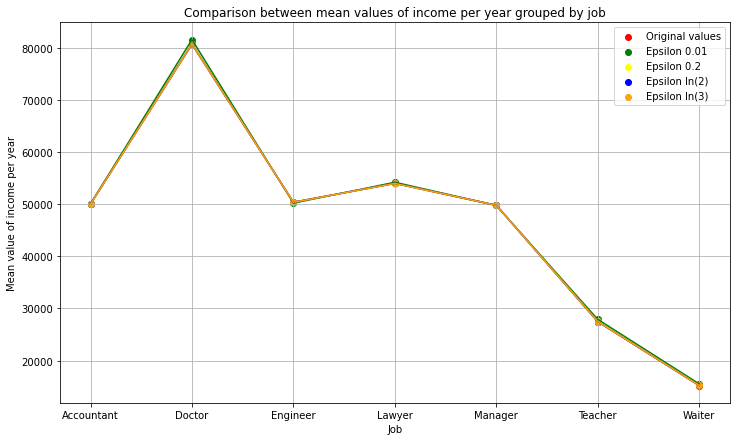

<Figure size 432x288 with 0 Axes>

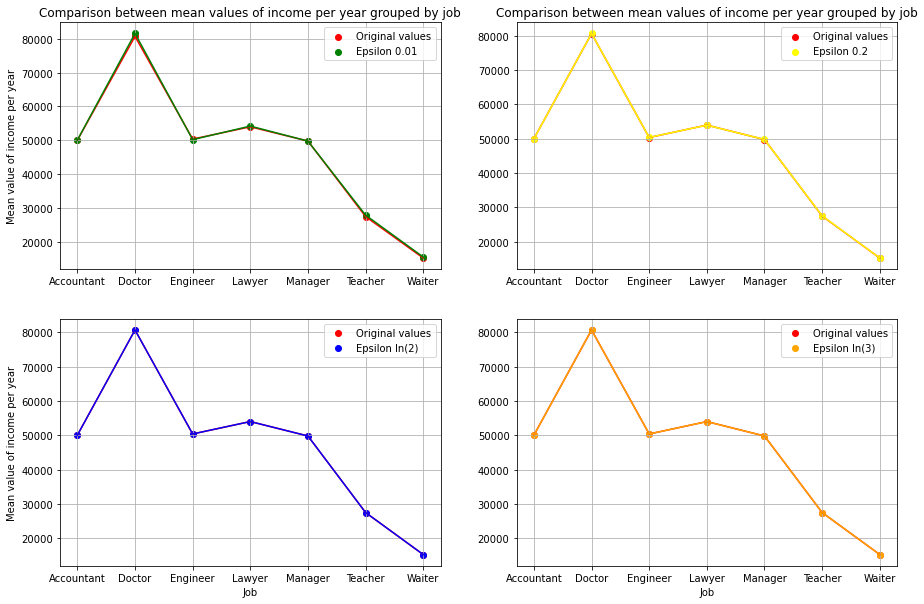

In [30]:
original_avg_ipy_job = dataset.groupby("job").mean()[["income_per_year", "number_kids", "age"]]

original_avg_0_01_ipy_job = dataset.copy()
original_avg_0_2_ipy_job = dataset.copy()
original_avg_ln2_ipy_job = dataset.copy()
original_avg_ln3_ipy_job = dataset.copy()

diff_priv(original_avg_0_01_ipy_job, "income_per_year", df_sensitivity.loc["dataset_original"]["income_per_year_avg"], epsilon=0.01)
diff_priv(original_avg_0_2_ipy_job, "income_per_year", df_sensitivity.loc["dataset_original"]["income_per_year_avg"], epsilon=0.2)
diff_priv(original_avg_ln2_ipy_job, "income_per_year", df_sensitivity.loc["dataset_original"]["income_per_year_avg"], epsilon=np.log(2))
diff_priv(original_avg_ln3_ipy_job, "income_per_year", df_sensitivity.loc["dataset_original"]["income_per_year_avg"], epsilon=np.log(3))

original_avg_0_01_ipy_job = original_avg_0_01_ipy_job.groupby("job").mean()[["income_per_year", "number_kids", "age"]]
original_avg_0_2_ipy_job = original_avg_0_2_ipy_job.groupby("job").mean()[["income_per_year", "number_kids", "age"]]
original_avg_ln2_ipy_job = original_avg_ln2_ipy_job.groupby("job").mean()[["income_per_year", "number_kids", "age"]]
original_avg_ln3_ipy_job = original_avg_ln3_ipy_job.groupby("job").mean()[["income_per_year", "number_kids", "age"]]

x = np.sort(dataset["job"].unique())

plt.figure(figsize=(12, 7))
plt.grid(True)
plt.title("Comparison between mean values of income per year grouped by job")
plt.ylabel("Mean value of income per year")
plt.xlabel("Job")

plt.plot(x, original_avg_ipy_job['income_per_year'], color='red')
plt.scatter(x, original_avg_ipy_job['income_per_year'], color='red', label="Original values")
plt.plot(x, original_avg_0_01_ipy_job["income_per_year"], color='green')
plt.scatter(x, original_avg_0_01_ipy_job["income_per_year"], label="Epsilon 0.01", color='green')
plt.plot(x, original_avg_0_2_ipy_job["income_per_year"], color='yellow')
plt.scatter(x, original_avg_0_2_ipy_job["income_per_year"], label="Epsilon 0.2", color='yellow')
plt.plot(x, original_avg_ln2_ipy_job["income_per_year"], color='blue')
plt.scatter(x, original_avg_ln2_ipy_job["income_per_year"], label="Epsilon ln(2)", color='blue')
plt.plot(x, original_avg_ln3_ipy_job["income_per_year"], color='orange')
plt.scatter(x, original_avg_ln3_ipy_job["income_per_year"], label="Epsilon ln(3)", color='orange')

plt.legend()
plt.show()

plt.figure()
plt.subplots(2, 2, figsize=(15, 10))

plt.subplot(2, 2, 1)
plt.grid(True)
plt.title("Comparison between mean values of income per year grouped by job")
plt.ylabel("Mean value of income per year")
plt.plot(x, original_avg_ipy_job['income_per_year'], color='red')
plt.scatter(x, original_avg_ipy_job['income_per_year'], color='red', label="Original values")
plt.plot(x, original_avg_0_01_ipy_job["income_per_year"], color='green')
plt.scatter(x, original_avg_0_01_ipy_job["income_per_year"], label="Epsilon 0.01", color='green')
plt.legend()

plt.subplot(2, 2, 2)
plt.grid(True)
plt.title("Comparison between mean values of income per year grouped by job")
plt.plot(x, original_avg_ipy_job['income_per_year'], color='red')
plt.scatter(x, original_avg_ipy_job['income_per_year'], color='red', label="Original values")
plt.plot(x, original_avg_0_2_ipy_job["income_per_year"], color='yellow')
plt.scatter(x, original_avg_0_2_ipy_job["income_per_year"], label="Epsilon 0.2", color='yellow')
plt.legend()

plt.subplot(2, 2, 3)
plt.grid(True)
plt.ylabel("Mean value of income per year")
plt.xlabel("Job")
plt.plot(x, original_avg_ipy_job['income_per_year'], color='red')
plt.scatter(x, original_avg_ipy_job['income_per_year'], color='red', label="Original values")
plt.plot(x, original_avg_ln2_ipy_job["income_per_year"], color='blue')
plt.scatter(x, original_avg_ln2_ipy_job["income_per_year"], label="Epsilon ln(2)", color='blue')
plt.legend()

plt.subplot(2, 2, 4)
plt.grid(True)
plt.xlabel("Job")
plt.plot(x, original_avg_ipy_job['income_per_year'], color='red')
plt.scatter(x, original_avg_ipy_job['income_per_year'], color='red', label="Original values")
plt.plot(x, original_avg_ln3_ipy_job["income_per_year"], color='orange')
plt.scatter(x, original_avg_ln3_ipy_job["income_per_year"], label="Epsilon ln(3)", color='orange')
plt.legend()
plt.show()

#### Grouped by Job - Income per year (Std)

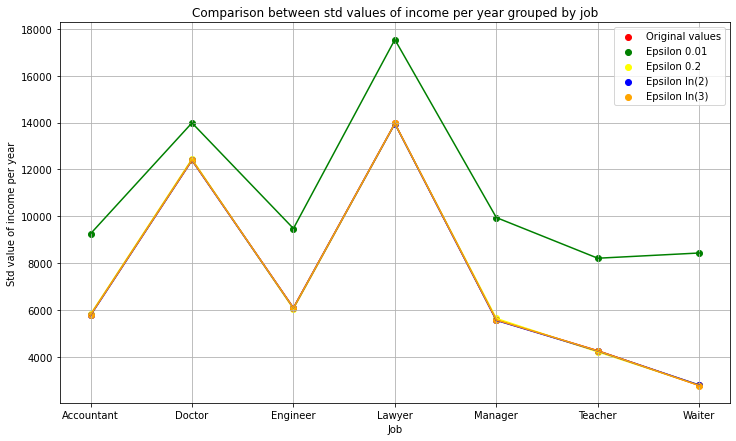

<Figure size 432x288 with 0 Axes>

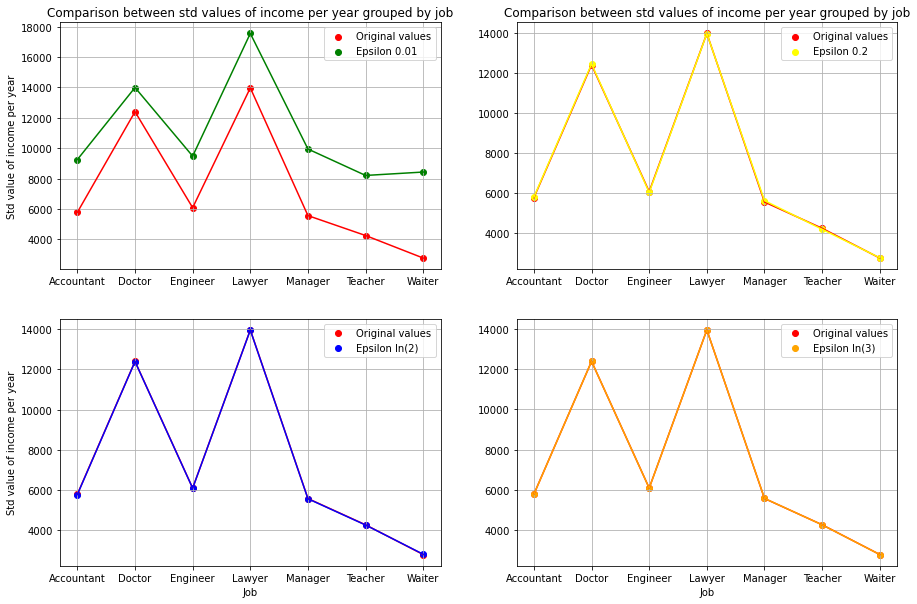

In [31]:
original_std_ipy_job = dataset.groupby("job").std()[["income_per_year", "number_kids", "age"]]

original_std_0_01_ipy_job = dataset.copy()
original_std_0_2_ipy_job = dataset.copy()
original_std_ln2_ipy_job = dataset.copy()
original_std_ln3_ipy_job = dataset.copy()

diff_priv(original_std_0_01_ipy_job, "income_per_year", df_sensitivity.loc["dataset_original"]["income_per_year_std"], epsilon=0.01)
diff_priv(original_std_0_2_ipy_job, "income_per_year", df_sensitivity.loc["dataset_original"]["income_per_year_std"], epsilon=0.2)
diff_priv(original_std_ln2_ipy_job, "income_per_year", df_sensitivity.loc["dataset_original"]["income_per_year_std"], epsilon=np.log(2))
diff_priv(original_std_ln3_ipy_job, "income_per_year", df_sensitivity.loc["dataset_original"]["income_per_year_std"], epsilon=np.log(3))

original_std_0_01_ipy_job = original_std_0_01_ipy_job.groupby("job").std()[["income_per_year", "number_kids", "age"]]
original_std_0_2_ipy_job = original_std_0_2_ipy_job.groupby("job").std()[["income_per_year", "number_kids", "age"]]
original_std_ln2_ipy_job = original_std_ln2_ipy_job.groupby("job").std()[["income_per_year", "number_kids", "age"]]
original_std_ln3_ipy_job = original_std_ln3_ipy_job.groupby("job").std()[["income_per_year", "number_kids", "age"]]

x = np.sort(dataset["job"].unique())

plt.figure(figsize=(12, 7))
plt.grid(True)
plt.title("Comparison between std values of income per year grouped by job")
plt.ylabel("Std value of income per year")
plt.xlabel("Job")

plt.plot(x, original_std_ipy_job['income_per_year'], color='red')
plt.scatter(x, original_std_ipy_job['income_per_year'], color='red', label="Original values")
plt.plot(x, original_std_0_01_ipy_job["income_per_year"], color='green')
plt.scatter(x, original_std_0_01_ipy_job["income_per_year"], label="Epsilon 0.01", color='green')
plt.plot(x, original_std_0_2_ipy_job["income_per_year"], color='yellow')
plt.scatter(x, original_std_0_2_ipy_job["income_per_year"], label="Epsilon 0.2", color='yellow')
plt.plot(x, original_std_ln2_ipy_job["income_per_year"], color='blue')
plt.scatter(x, original_std_ln2_ipy_job["income_per_year"], label="Epsilon ln(2)", color='blue')
plt.plot(x, original_std_ln3_ipy_job["income_per_year"], color='orange')
plt.scatter(x, original_std_ln3_ipy_job["income_per_year"], label="Epsilon ln(3)", color='orange')

plt.legend()
plt.show()

plt.figure()
plt.subplots(2, 2, figsize=(15, 10))

plt.subplot(2, 2, 1)
plt.grid(True)
plt.title("Comparison between std values of income per year grouped by job")
plt.ylabel("Std value of income per year")
plt.plot(x, original_std_ipy_job['income_per_year'], color='red')
plt.scatter(x, original_std_ipy_job['income_per_year'], color='red', label="Original values")
plt.plot(x, original_std_0_01_ipy_job["income_per_year"], color='green')
plt.scatter(x, original_std_0_01_ipy_job["income_per_year"], label="Epsilon 0.01", color='green')
plt.legend()

plt.subplot(2, 2, 2)
plt.grid(True)
plt.title("Comparison between std values of income per year grouped by job")
plt.plot(x, original_std_ipy_job['income_per_year'], color='red')
plt.scatter(x, original_std_ipy_job['income_per_year'], color='red', label="Original values")
plt.plot(x, original_std_0_2_ipy_job["income_per_year"], color='yellow')
plt.scatter(x, original_std_0_2_ipy_job["income_per_year"], label="Epsilon 0.2", color='yellow')
plt.legend()

plt.subplot(2, 2, 3)
plt.grid(True)
plt.ylabel("Std value of income per year")
plt.xlabel("Job")
plt.plot(x, original_std_ipy_job['income_per_year'], color='red')
plt.scatter(x, original_std_ipy_job['income_per_year'], color='red', label="Original values")
plt.plot(x, original_std_ln2_ipy_job["income_per_year"], color='blue')
plt.scatter(x, original_std_ln2_ipy_job["income_per_year"], label="Epsilon ln(2)", color='blue')
plt.legend()

plt.subplot(2, 2, 4)
plt.grid(True)
plt.xlabel("Job")
plt.plot(x, original_std_ipy_job['income_per_year'], color='red')
plt.scatter(x, original_std_ipy_job['income_per_year'], color='red', label="Original values")
plt.plot(x, original_std_ln3_ipy_job["income_per_year"], color='orange')
plt.scatter(x, original_std_ln3_ipy_job["income_per_year"], label="Epsilon ln(3)", color='orange')
plt.legend()
plt.show()

#### Grouped by Job - Age (Mean)

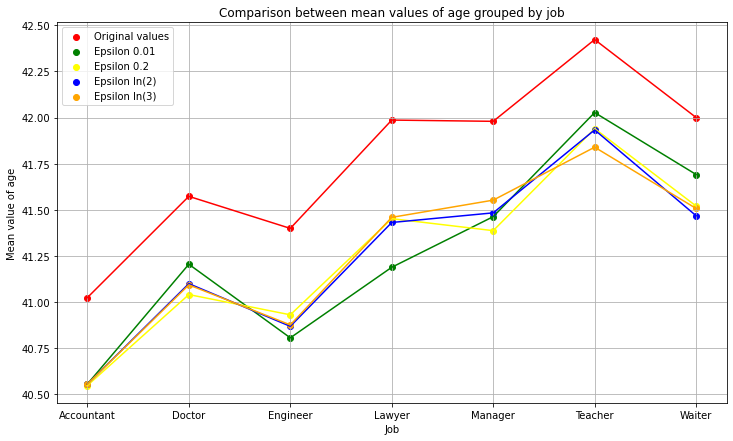

<Figure size 432x288 with 0 Axes>

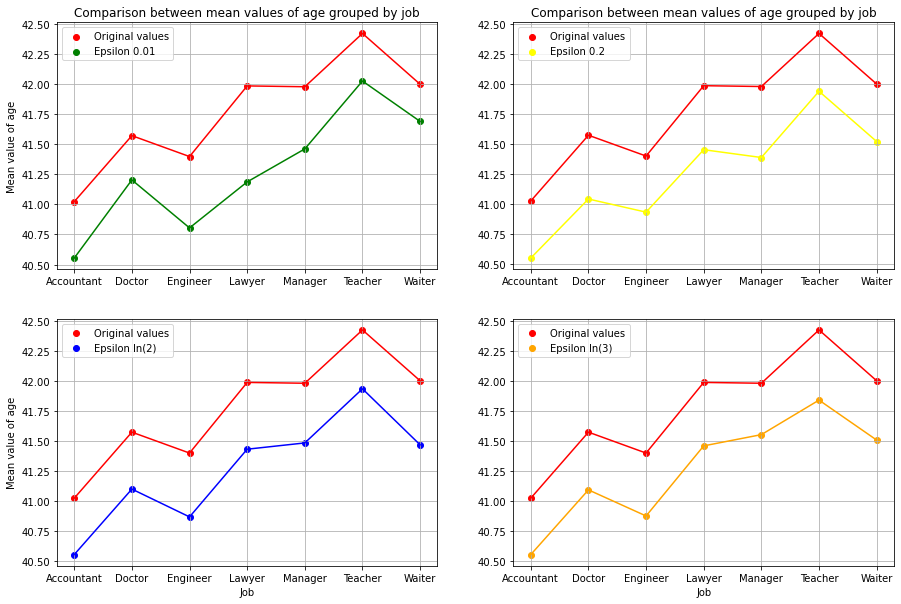

In [32]:
original_avg_age_job = dataset.groupby("job").mean()[["income_per_year", "number_kids", "age"]]

original_avg_0_01_age_job = dataset.copy()
original_avg_0_2_age_job = dataset.copy()
original_avg_ln2_age_job = dataset.copy()
original_avg_ln3_age_job = dataset.copy()

diff_priv(original_avg_0_01_age_job, "age", df_sensitivity.loc["dataset_original"]["age_avg"], epsilon=0.01)
diff_priv(original_avg_0_2_age_job, "age", df_sensitivity.loc["dataset_original"]["age_avg"], epsilon=0.2)
diff_priv(original_avg_ln2_age_job, "age", df_sensitivity.loc["dataset_original"]["age_avg"], epsilon=np.log(2))
diff_priv(original_avg_ln3_age_job, "age", df_sensitivity.loc["dataset_original"]["age_avg"], epsilon=np.log(3))

original_avg_0_01_age_job = original_avg_0_01_age_job.groupby("job").mean()[["income_per_year", "number_kids", "age"]]
original_avg_0_2_age_job = original_avg_0_2_age_job.groupby("job").mean()[["income_per_year", "number_kids", "age"]]
original_avg_ln2_age_job = original_avg_ln2_age_job.groupby("job").mean()[["income_per_year", "number_kids", "age"]]
original_avg_ln3_age_job = original_avg_ln3_age_job.groupby("job").mean()[["income_per_year", "number_kids", "age"]]

x = np.sort(dataset["job"].unique())

plt.figure(figsize=(12, 7))
plt.grid(True)
plt.title("Comparison between mean values of age grouped by job")
plt.ylabel("Mean value of age")
plt.xlabel("Job")

plt.plot(x, original_avg_age_job['age'], color='red')
plt.scatter(x, original_avg_age_job['age'], color='red', label="Original values")
plt.plot(x, original_avg_0_01_age_job["age"], color='green')
plt.scatter(x, original_avg_0_01_age_job["age"], label="Epsilon 0.01", color='green')
plt.plot(x, original_avg_0_2_age_job["age"], color='yellow')
plt.scatter(x, original_avg_0_2_age_job["age"], label="Epsilon 0.2", color='yellow')
plt.plot(x, original_avg_ln2_age_job["age"], color='blue')
plt.scatter(x, original_avg_ln2_age_job["age"], label="Epsilon ln(2)", color='blue')
plt.plot(x, original_avg_ln3_age_job["age"], color='orange')
plt.scatter(x, original_avg_ln3_age_job["age"], label="Epsilon ln(3)", color='orange')

plt.legend()
plt.show()

plt.figure()
plt.subplots(2, 2, figsize=(15, 10))

plt.subplot(2, 2, 1)
plt.grid(True)
plt.title("Comparison between mean values of age grouped by job")
plt.ylabel("Mean value of age")
plt.plot(x, original_avg_age_job['age'], color='red')
plt.scatter(x, original_avg_age_job['age'], color='red', label="Original values")
plt.plot(x, original_avg_0_01_age_job["age"], color='green')
plt.scatter(x, original_avg_0_01_age_job["age"], label="Epsilon 0.01", color='green')
plt.legend()

plt.subplot(2, 2, 2)
plt.grid(True)
plt.title("Comparison between mean values of age grouped by job")
plt.plot(x, original_avg_age_job['age'], color='red')
plt.scatter(x, original_avg_age_job['age'], color='red', label="Original values")
plt.plot(x, original_avg_0_2_age_job["age"], color='yellow')
plt.scatter(x, original_avg_0_2_age_job["age"], label="Epsilon 0.2", color='yellow')
plt.legend()

plt.subplot(2, 2, 3)
plt.grid(True)
plt.ylabel("Mean value of age")
plt.xlabel("Job")
plt.plot(x, original_avg_age_job['age'], color='red')
plt.scatter(x, original_avg_age_job['age'], color='red', label="Original values")
plt.plot(x, original_avg_ln2_age_job["age"], color='blue')
plt.scatter(x, original_avg_ln2_age_job["age"], label="Epsilon ln(2)", color='blue')
plt.legend()

plt.subplot(2, 2, 4)
plt.grid(True)
plt.xlabel("Job")
plt.plot(x, original_avg_age_job['age'], color='red')
plt.scatter(x, original_avg_age_job['age'], color='red', label="Original values")
plt.plot(x, original_avg_ln3_age_job["age"], color='orange')
plt.scatter(x, original_avg_ln3_age_job["age"], label="Epsilon ln(3)", color='orange')
plt.legend()
plt.show()

#### Grouped by Job - Age (Std)

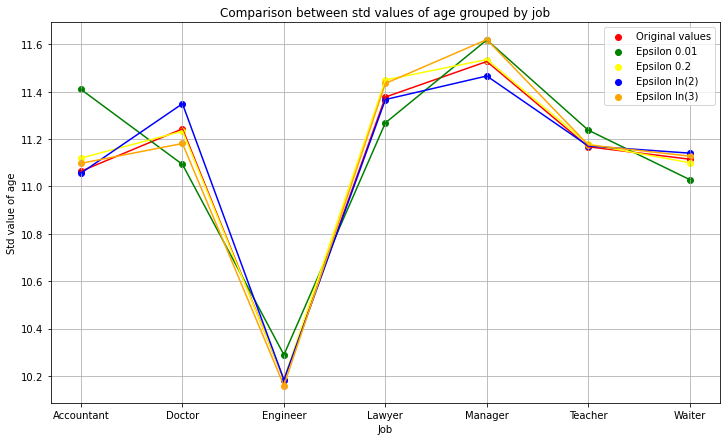

<Figure size 432x288 with 0 Axes>

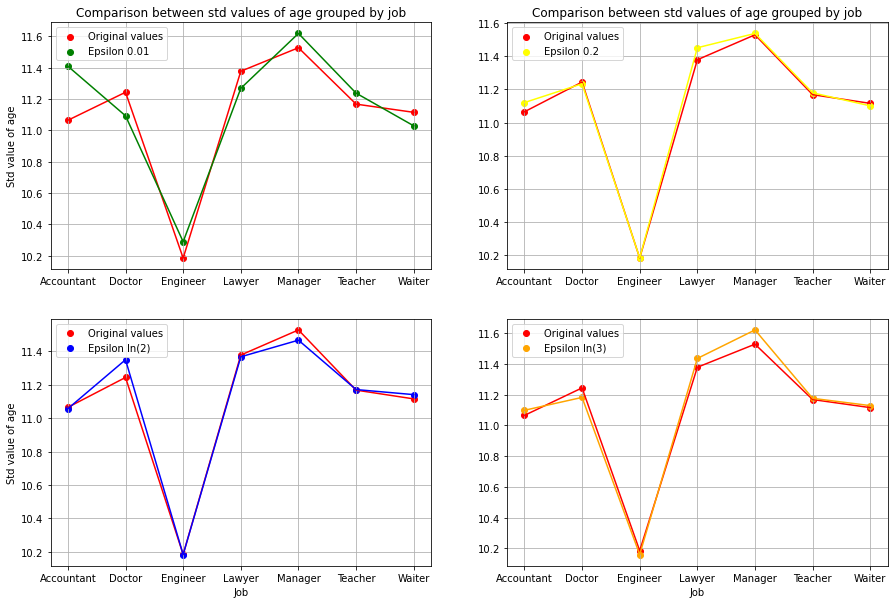

In [33]:
original_std_age_job = dataset.groupby("job").std()[["income_per_year", "number_kids", "age"]]

original_std_0_01_age_job = dataset.copy()
original_std_0_2_age_job = dataset.copy()
original_std_ln2_age_job = dataset.copy()
original_std_ln3_age_job = dataset.copy()

diff_priv(original_std_0_01_age_job, "age", df_sensitivity.loc["dataset_original"]["age_std"], epsilon=0.01)
diff_priv(original_std_0_2_age_job, "age", df_sensitivity.loc["dataset_original"]["age_std"], epsilon=0.2)
diff_priv(original_std_ln2_age_job, "age", df_sensitivity.loc["dataset_original"]["age_std"], epsilon=np.log(2))
diff_priv(original_std_ln3_age_job, "age", df_sensitivity.loc["dataset_original"]["age_std"], epsilon=np.log(3))

original_std_0_01_age_job = original_std_0_01_age_job.groupby("job").std()[["income_per_year", "number_kids", "age"]]
original_std_0_2_age_job = original_std_0_2_age_job.groupby("job").std()[["income_per_year", "number_kids", "age"]]
original_std_ln2_age_job = original_std_ln2_age_job.groupby("job").std()[["income_per_year", "number_kids", "age"]]
original_std_ln3_age_job = original_std_ln3_age_job.groupby("job").std()[["income_per_year", "number_kids", "age"]]

x = np.sort(dataset["job"].unique())

plt.figure(figsize=(12, 7))
plt.grid(True)
plt.title("Comparison between std values of age grouped by job")
plt.ylabel("Std value of age")
plt.xlabel("Job")

plt.plot(x, original_std_age_job['age'], color='red')
plt.scatter(x, original_std_age_job['age'], color='red', label="Original values")
plt.plot(x, original_std_0_01_age_job["age"], color='green')
plt.scatter(x, original_std_0_01_age_job["age"], label="Epsilon 0.01", color='green')
plt.plot(x, original_std_0_2_age_job["age"], color='yellow')
plt.scatter(x, original_std_0_2_age_job["age"], label="Epsilon 0.2", color='yellow')
plt.plot(x, original_std_ln2_age_job["age"], color='blue')
plt.scatter(x, original_std_ln2_age_job["age"], label="Epsilon ln(2)", color='blue')
plt.plot(x, original_std_ln3_age_job["age"], color='orange')
plt.scatter(x, original_std_ln3_age_job["age"], label="Epsilon ln(3)", color='orange')

plt.legend()
plt.show()

plt.figure()
plt.subplots(2, 2, figsize=(15, 10))

plt.subplot(2, 2, 1)
plt.grid(True)
plt.title("Comparison between std values of age grouped by job")
plt.ylabel("Std value of age")
plt.plot(x, original_std_age_job['age'], color='red')
plt.scatter(x, original_std_age_job['age'], color='red', label="Original values")
plt.plot(x, original_std_0_01_age_job["age"], color='green')
plt.scatter(x, original_std_0_01_age_job["age"], label="Epsilon 0.01", color='green')
plt.legend()

plt.subplot(2, 2, 2)
plt.grid(True)
plt.title("Comparison between std values of age grouped by job")
plt.plot(x, original_std_age_job['age'], color='red')
plt.scatter(x, original_std_age_job['age'], color='red', label="Original values")
plt.plot(x, original_std_0_2_age_job["age"], color='yellow')
plt.scatter(x, original_std_0_2_age_job["age"], label="Epsilon 0.2", color='yellow')
plt.legend()

plt.subplot(2, 2, 3)
plt.grid(True)
plt.ylabel("Std value of age")
plt.xlabel("Job")
plt.plot(x, original_std_age_job['age'], color='red')
plt.scatter(x, original_std_age_job['age'], color='red', label="Original values")
plt.plot(x, original_std_ln2_age_job["age"], color='blue')
plt.scatter(x, original_std_ln2_age_job["age"], label="Epsilon ln(2)", color='blue')
plt.legend()

plt.subplot(2, 2, 4)
plt.grid(True)
plt.xlabel("Job")
plt.plot(x, original_std_age_job['age'], color='red')
plt.scatter(x, original_std_age_job['age'], color='red', label="Original values")
plt.plot(x, original_std_ln3_age_job["age"], color='orange')
plt.scatter(x, original_std_ln3_age_job["age"], label="Epsilon ln(3)", color='orange')
plt.legend()
plt.show()

#### Grouped by Job - Number of kids (Mean)

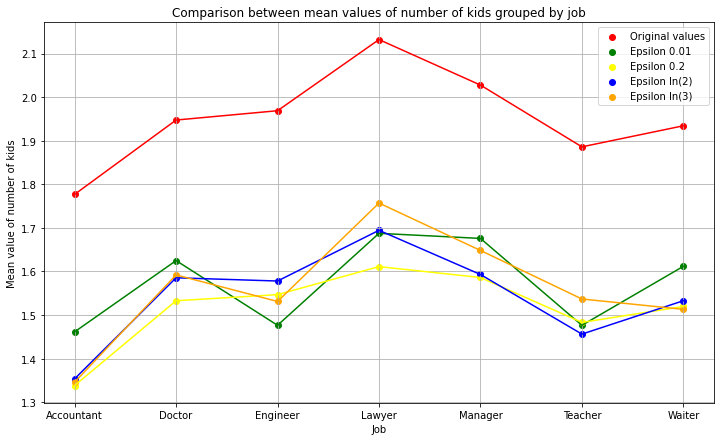

<Figure size 432x288 with 0 Axes>

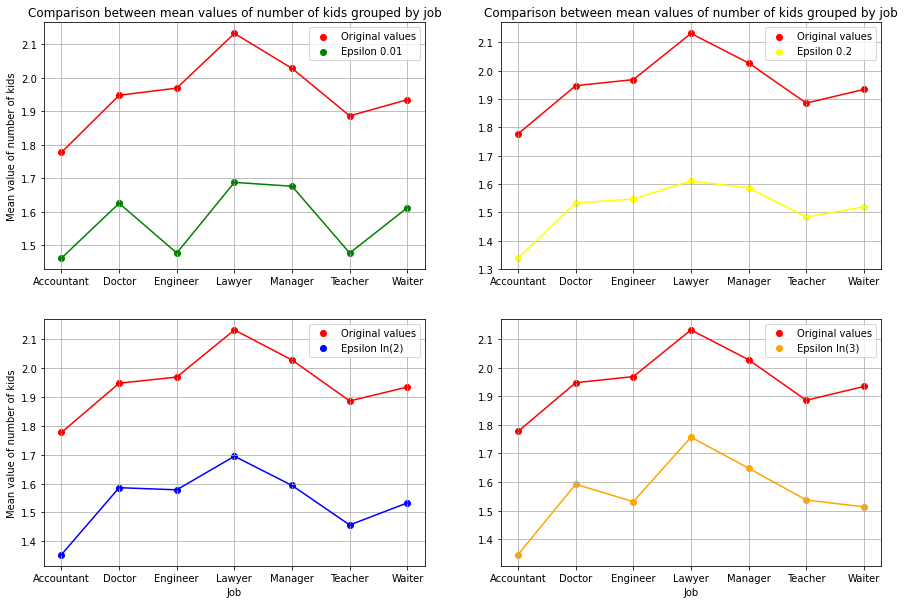

In [34]:
original_avg_nk_job = dataset.groupby("job").mean()[["income_per_year", "number_kids", "age"]]

original_avg_0_01_nk_job = dataset.copy()
original_avg_0_2_nk_job = dataset.copy()
original_avg_ln2_nk_job = dataset.copy()
original_avg_ln3_nk_job = dataset.copy()

diff_priv(original_avg_0_01_nk_job, "number_kids", df_sensitivity.loc["dataset_original"]["number_kids_avg"], epsilon=0.01)
diff_priv(original_avg_0_2_nk_job, "number_kids", df_sensitivity.loc["dataset_original"]["number_kids_avg"], epsilon=0.2)
diff_priv(original_avg_ln2_nk_job, "number_kids", df_sensitivity.loc["dataset_original"]["number_kids_avg"], epsilon=np.log(2))
diff_priv(original_avg_ln3_nk_job, "number_kids", df_sensitivity.loc["dataset_original"]["number_kids_avg"], epsilon=np.log(3))

original_avg_0_01_nk_job = original_avg_0_01_nk_job.groupby("job").mean()[["income_per_year", "number_kids", "age"]]
original_avg_0_2_nk_job = original_avg_0_2_nk_job.groupby("job").mean()[["income_per_year", "number_kids", "age"]]
original_avg_ln2_nk_job = original_avg_ln2_nk_job.groupby("job").mean()[["income_per_year", "number_kids", "age"]]
original_avg_ln3_nk_job = original_avg_ln3_nk_job.groupby("job").mean()[["income_per_year", "number_kids", "age"]]

x = np.sort(dataset["job"].unique())

plt.figure(figsize=(12, 7))
plt.grid(True)
plt.title("Comparison between mean values of number of kids grouped by job")
plt.ylabel("Mean value of number of kids")
plt.xlabel("Job")

plt.plot(x, original_avg_nk_job['number_kids'], color='red')
plt.scatter(x, original_avg_nk_job['number_kids'], color='red', label="Original values")
plt.plot(x, original_avg_0_01_nk_job["number_kids"], color='green')
plt.scatter(x, original_avg_0_01_nk_job["number_kids"], label="Epsilon 0.01", color='green')
plt.plot(x, original_avg_0_2_nk_job["number_kids"], color='yellow')
plt.scatter(x, original_avg_0_2_nk_job["number_kids"], label="Epsilon 0.2", color='yellow')
plt.plot(x, original_avg_ln2_nk_job["number_kids"], color='blue')
plt.scatter(x, original_avg_ln2_nk_job["number_kids"], label="Epsilon ln(2)", color='blue')
plt.plot(x, original_avg_ln3_nk_job["number_kids"], color='orange')
plt.scatter(x, original_avg_ln3_nk_job["number_kids"], label="Epsilon ln(3)", color='orange')

plt.legend()
plt.show()

plt.figure()
plt.subplots(2, 2, figsize=(15, 10))

plt.subplot(2, 2, 1)
plt.grid(True)
plt.title("Comparison between mean values of number of kids grouped by job")
plt.ylabel("Mean value of number of kids")
plt.plot(x, original_avg_nk_job['number_kids'], color='red')
plt.scatter(x, original_avg_nk_job['number_kids'], color='red', label="Original values")
plt.plot(x, original_avg_0_01_nk_job["number_kids"], color='green')
plt.scatter(x, original_avg_0_01_nk_job["number_kids"], label="Epsilon 0.01", color='green')
plt.legend()

plt.subplot(2, 2, 2)
plt.grid(True)
plt.title("Comparison between mean values of number of kids grouped by job")
plt.plot(x, original_avg_nk_job['number_kids'], color='red')
plt.scatter(x, original_avg_nk_job['number_kids'], color='red', label="Original values")
plt.plot(x, original_avg_0_2_nk_job["number_kids"], color='yellow')
plt.scatter(x, original_avg_0_2_nk_job["number_kids"], label="Epsilon 0.2", color='yellow')
plt.legend()

plt.subplot(2, 2, 3)
plt.grid(True)
plt.ylabel("Mean value of number of kids")
plt.xlabel("Job")
plt.plot(x, original_avg_nk_job['number_kids'], color='red')
plt.scatter(x, original_avg_nk_job['number_kids'], color='red', label="Original values")
plt.plot(x, original_avg_ln2_nk_job["number_kids"], color='blue')
plt.scatter(x, original_avg_ln2_nk_job["number_kids"], label="Epsilon ln(2)", color='blue')
plt.legend()

plt.subplot(2, 2, 4)
plt.grid(True)
plt.xlabel("Job")
plt.plot(x, original_avg_nk_job['number_kids'], color='red')
plt.scatter(x, original_avg_nk_job['number_kids'], color='red', label="Original values")
plt.plot(x, original_avg_ln3_nk_job["number_kids"], color='orange')
plt.scatter(x, original_avg_ln3_nk_job["number_kids"], label="Epsilon ln(3)", color='orange')
plt.legend()
plt.show()

#### Grouped by Job - Number of kids (Std)

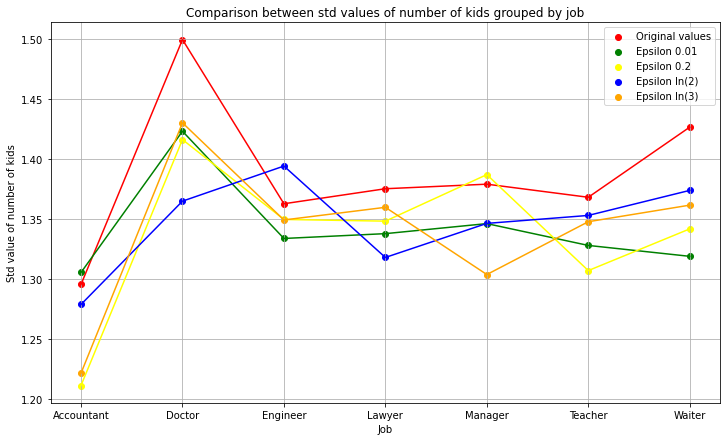

<Figure size 432x288 with 0 Axes>

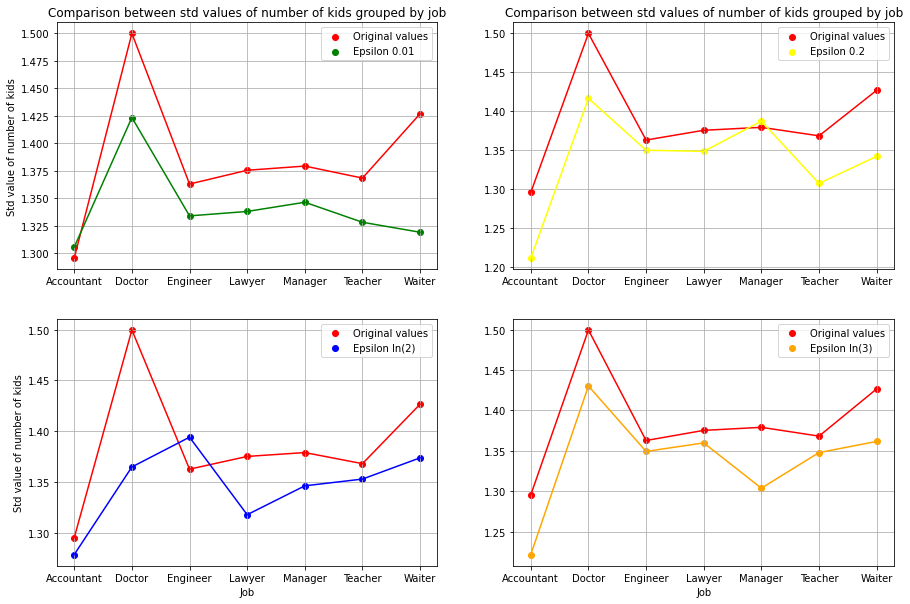

In [35]:
original_std_nk_job = dataset.groupby("job").std()[["income_per_year", "number_kids", "age"]]

original_std_0_01_nk_job = dataset.copy()
original_std_0_2_nk_job = dataset.copy()
original_std_ln2_nk_job = dataset.copy()
original_std_ln3_nk_job = dataset.copy()

diff_priv(original_std_0_01_nk_job, "number_kids", df_sensitivity.loc["dataset_original"]["number_kids_std"], epsilon=0.01)
diff_priv(original_std_0_2_nk_job, "number_kids", df_sensitivity.loc["dataset_original"]["number_kids_std"], epsilon=0.2)
diff_priv(original_std_ln2_nk_job, "number_kids", df_sensitivity.loc["dataset_original"]["number_kids_std"], epsilon=np.log(2))
diff_priv(original_std_ln3_nk_job, "number_kids", df_sensitivity.loc["dataset_original"]["number_kids_std"], epsilon=np.log(3))

original_std_0_01_nk_job = original_std_0_01_nk_job.groupby("job").std()[["income_per_year", "number_kids", "age"]]
original_std_0_2_nk_job = original_std_0_2_nk_job.groupby("job").std()[["income_per_year", "number_kids", "age"]]
original_std_ln2_nk_job = original_std_ln2_nk_job.groupby("job").std()[["income_per_year", "number_kids", "age"]]
original_std_ln3_nk_job = original_std_ln3_nk_job.groupby("job").std()[["income_per_year", "number_kids", "age"]]

x = np.sort(dataset["job"].unique())

plt.figure(figsize=(12, 7))
plt.grid(True)
plt.title("Comparison between std values of number of kids grouped by job")
plt.ylabel("Std value of number of kids")
plt.xlabel("Job")

plt.plot(x, original_std_nk_job['number_kids'], color='red')
plt.scatter(x, original_std_nk_job['number_kids'], color='red', label="Original values")
plt.plot(x, original_std_0_01_nk_job["number_kids"], color='green')
plt.scatter(x, original_std_0_01_nk_job["number_kids"], label="Epsilon 0.01", color='green')
plt.plot(x, original_std_0_2_nk_job["number_kids"], color='yellow')
plt.scatter(x, original_std_0_2_nk_job["number_kids"], label="Epsilon 0.2", color='yellow')
plt.plot(x, original_std_ln2_nk_job["number_kids"], color='blue')
plt.scatter(x, original_std_ln2_nk_job["number_kids"], label="Epsilon ln(2)", color='blue')
plt.plot(x, original_std_ln3_nk_job["number_kids"], color='orange')
plt.scatter(x, original_std_ln3_nk_job["number_kids"], label="Epsilon ln(3)", color='orange')

plt.legend()
plt.show()

plt.figure()
plt.subplots(2, 2, figsize=(15, 10))

plt.subplot(2, 2, 1)
plt.grid(True)
plt.title("Comparison between std values of number of kids grouped by job")
plt.ylabel("Std value of number of kids")
plt.plot(x, original_std_nk_job['number_kids'], color='red')
plt.scatter(x, original_std_nk_job['number_kids'], color='red', label="Original values")
plt.plot(x, original_std_0_01_nk_job["number_kids"], color='green')
plt.scatter(x, original_std_0_01_nk_job["number_kids"], label="Epsilon 0.01", color='green')
plt.legend()

plt.subplot(2, 2, 2)
plt.grid(True)
plt.title("Comparison between std values of number of kids grouped by job")
plt.plot(x, original_std_nk_job['number_kids'], color='red')
plt.scatter(x, original_std_nk_job['number_kids'], color='red', label="Original values")
plt.plot(x, original_std_0_2_nk_job["number_kids"], color='yellow')
plt.scatter(x, original_std_0_2_nk_job["number_kids"], label="Epsilon 0.2", color='yellow')
plt.legend()

plt.subplot(2, 2, 3)
plt.grid(True)
plt.ylabel("Std value of number of kids")
plt.xlabel("Job")
plt.plot(x, original_std_nk_job['number_kids'], color='red')
plt.scatter(x, original_std_nk_job['number_kids'], color='red', label="Original values")
plt.plot(x, original_std_ln2_nk_job["number_kids"], color='blue')
plt.scatter(x, original_std_ln2_nk_job["number_kids"], label="Epsilon ln(2)", color='blue')
plt.legend()

plt.subplot(2, 2, 4)
plt.grid(True)
plt.xlabel("Job")
plt.plot(x, original_std_nk_job['number_kids'], color='red')
plt.scatter(x, original_std_nk_job['number_kids'], color='red', label="Original values")
plt.plot(x, original_std_ln3_nk_job["number_kids"], color='orange')
plt.scatter(x, original_std_ln3_nk_job["number_kids"], label="Epsilon ln(3)", color='orange')
plt.legend()
plt.show()

### - Nos gráficos abaixo, estamos a analisar uma query repetida 100 vezes, sendo que a cada query feita, é sempre aplicada differencial privacy, sempre adicionando valores aleatórios às entradas, fazendo varia sempre o valor da média dos salários

### - Para cada uma das linhas, o primeiro valor é o valor original, como tal e sabendo que há medida que aumentamos o valor de epsilon, menor a diferença para os dados originais, os resultados das queries tendo a aproximar-se dos originais, como podemos pela diferença clara entre os valores quando epsilon = 0.01 e epsilon = ln(3)

#### Same query multiple times - Average income per year by gender

0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90 91 92 93 94 95 96 97 98 99 

<Figure size 432x288 with 0 Axes>

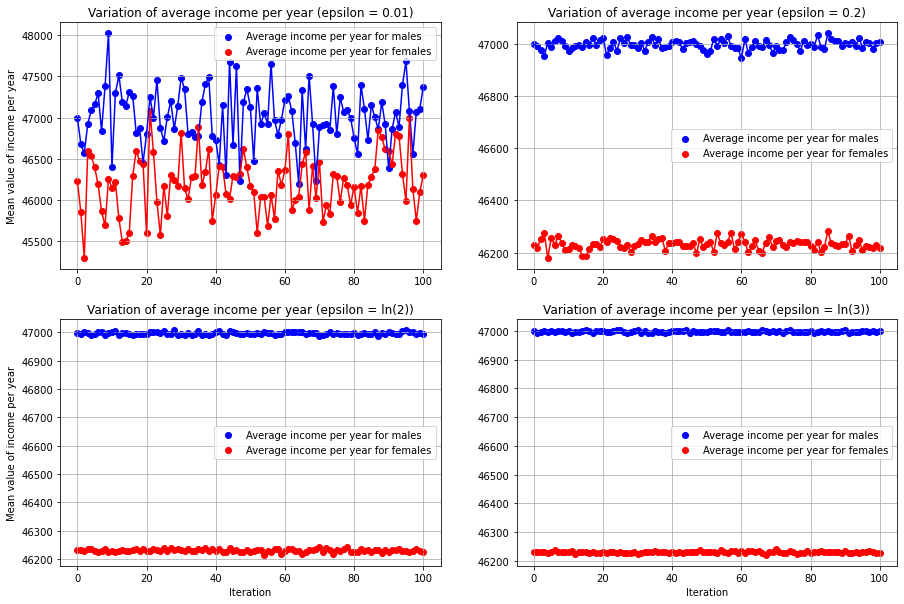

In [36]:
# Store all the values of the same query
query_results_male_0_01 = []
query_results_female_0_01 = []
query_results_male_0_2 = []
query_results_female_0_2 = []
query_results_male_ln2 = []
query_results_female_ln2 = []
query_results_male_ln3 = []
query_results_female_ln3 = []

ax = dataset.groupby("gender").mean()[["income_per_year"]]
query_results_male_0_01.append(ax.loc["Male"]["income_per_year"])
query_results_female_0_01.append(ax.loc["Female"]["income_per_year"])
query_results_male_0_2.append(ax.loc["Male"]["income_per_year"])
query_results_female_0_2.append(ax.loc["Female"]["income_per_year"])
query_results_male_ln2.append(ax.loc["Male"]["income_per_year"])
query_results_female_ln2.append(ax.loc["Female"]["income_per_year"])
query_results_male_ln3.append(ax.loc["Male"]["income_per_year"])
query_results_female_ln3.append(ax.loc["Female"]["income_per_year"])

for i in range(100):
    print(i, end=" ")
    male_0_01 = dataset.copy()
    female_0_01 = dataset.copy()
    male_0_2 = dataset.copy()
    female_0_2 = dataset.copy()
    male_ln2 = dataset.copy()
    female_ln2 = dataset.copy()
    male_ln3 = dataset.copy()
    female_ln3 = dataset.copy()
    
    diff_priv(male_0_01, "income_per_year", df_sensitivity.loc["dataset_original"]["income_per_year_avg"], epsilon=0.01)
    diff_priv(female_0_01, "income_per_year", df_sensitivity.loc["dataset_original"]["income_per_year_avg"], epsilon=0.01)
    diff_priv(male_0_2, "income_per_year", df_sensitivity.loc["dataset_original"]["income_per_year_avg"], epsilon=0.2)
    diff_priv(female_0_2, "income_per_year", df_sensitivity.loc["dataset_original"]["income_per_year_avg"], epsilon=0.2)
    diff_priv(male_ln2, "income_per_year", df_sensitivity.loc["dataset_original"]["income_per_year_avg"], epsilon=np.log(2))
    diff_priv(female_ln2, "income_per_year", df_sensitivity.loc["dataset_original"]["income_per_year_avg"], epsilon=np.log(2))
    diff_priv(male_ln3, "income_per_year", df_sensitivity.loc["dataset_original"]["income_per_year_avg"], epsilon=np.log(3))
    diff_priv(female_ln3, "income_per_year", df_sensitivity.loc["dataset_original"]["income_per_year_avg"], epsilon=np.log(3))
    
    male_0_01 = male_0_01.groupby("gender").mean()[["income_per_year"]]
    female_0_01 = female_0_01.groupby("gender").mean()[["income_per_year"]]
    male_0_2 = male_0_2.groupby("gender").mean()[["income_per_year"]]
    female_0_2 = female_0_2.groupby("gender").mean()[["income_per_year"]]
    male_ln2 = male_ln2.groupby("gender").mean()[["income_per_year"]]
    female_ln2 = female_ln2.groupby("gender").mean()[["income_per_year"]]
    male_ln3 = male_ln3.groupby("gender").mean()[["income_per_year"]]
    female_ln3 = female_ln3.groupby("gender").mean()[["income_per_year"]]
    
    query_results_male_0_01.append(male_0_01.loc["Male"]["income_per_year"])
    query_results_female_0_01.append(female_0_01.loc["Female"]["income_per_year"])
    query_results_male_0_2.append(male_0_2.loc["Male"]["income_per_year"])
    query_results_female_0_2.append(female_0_2.loc["Female"]["income_per_year"])
    query_results_male_ln2.append(male_ln2.loc["Male"]["income_per_year"])
    query_results_female_ln2.append(female_ln2.loc["Female"]["income_per_year"])
    query_results_male_ln3.append(male_ln3.loc["Male"]["income_per_year"])
    query_results_female_ln3.append(female_ln3.loc["Female"]["income_per_year"])
    
x = range(len(query_results_male_0_01))

plt.figure()
plt.subplots(2, 2, figsize=(15, 10))

plt.subplot(2, 2, 1)
plt.grid(True)
plt.title("Variation of average income per year (epsilon = 0.01)")
plt.ylabel("Mean value of income per year")
plt.scatter(x, query_results_male_0_01, color='blue', label='Average income per year for males')
plt.scatter(x, query_results_female_0_01, color='red', label='Average income per year for females')
plt.plot(x, query_results_male_0_01, color='blue')
plt.plot(x, query_results_female_0_01, color='red')
plt.legend()

plt.subplot(2, 2, 2)
plt.grid(True)
plt.title("Variation of average income per year (epsilon = 0.2)")
plt.scatter(x, query_results_male_0_2, color='blue', label='Average income per year for males')
plt.scatter(x, query_results_female_0_2, color='red', label='Average income per year for females')
plt.plot(x, query_results_male_0_2, color='blue')
plt.plot(x, query_results_female_0_2, color='red')
plt.legend()

plt.subplot(2, 2, 3)
plt.grid(True)
plt.title("Variation of average income per year (epsilon = ln(2))")
plt.ylabel("Mean value of income per year")
plt.xlabel("Iteration")
plt.scatter(x, query_results_male_ln2, color='blue', label='Average income per year for males')
plt.scatter(x, query_results_female_ln2, color='red', label='Average income per year for females')
plt.plot(x, query_results_male_ln2, color='blue')
plt.plot(x, query_results_female_ln2, color='red')
plt.legend()

plt.subplot(2, 2, 4)
plt.grid(True)
plt.title("Variation of average income per year (epsilon = ln(3))")
plt.xlabel("Iteration")
plt.scatter(x, query_results_male_ln3, color='blue', label='Average income per year for males')
plt.scatter(x, query_results_female_ln3, color='red', label='Average income per year for females')
plt.plot(x, query_results_male_ln3, color='blue')
plt.plot(x, query_results_female_ln3, color='red')

plt.legend()

plt.show()

# Exercise 5 - Discuss advantages and disadvantages.

<h4>Advantages:</h4>

- Ajusta os resultados das várias queries de modo a ser o mais preciso possível, garantindo a privacidade dos dados dos utilizadores

- É possível definir o nível de <i>noise</i> adicionado aos atributos sensíveis (valor de ɛ), aumentando ou diminuindo assim a privacidade dos dados

- Se quisermos fornecer o dataset a duas pessoas diferentes, fazendo variar entre eles o valor de ɛ, mesmo que estas tentem juntar-se para tentar recuperar os dados originais, torna-se impossível

<h4>Disadvantages:</h4>

- Funciona melhor para dados de baixa sensibilidade (por exemplo, se estivermos a procurar pela pessoa mais velha de uma equipa, este pode fornecer dado completamente errados)

- Custo computacional elevado (pois necessita de calcular a sensividade dos dados e de seguida aplicar o algoritmo)

<h4>Queries</h4>

- Se estivermos a falar de queries de contadores, estas funcionam bem uma vez que a presença de mais ou menos um elemento apenas vai alterar o resultado ligeiramente.

- Somas, máximos, mínimos, médias podem ser um problema pois na presença de um elemento com um valor extremamente elevado vai implicar com que o resultado final se altere bastante uma vez que sejá necessário adicionar bastante <i>noise</i>.